# Data Wrangling

In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

In [2]:
from nycflights13 import flights
from nycflights13 import airports
from nycflights13 import weather
from nycflights13 import planes
from nycflights13 import airlines

In [3]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,725,N804JB,JFK,BQN,183.00,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z


In [4]:
airports

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.13,-80.62,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.46,-85.68,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.99,-88.10,801,-6,A,America/Chicago
3,06N,Randall Airport,41.43,-74.39,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.07,-81.43,11,-5,A,America/New_York
...,...,...,...,...,...,...,...,...
1453,ZUN,Black Rock,35.08,-108.79,6454,-7,A,America/Denver
1454,ZVE,New Haven Rail Station,41.30,-72.93,7,-5,A,America/New_York
1455,ZWI,Wilmington Amtrak Station,39.74,-75.55,0,-5,A,America/New_York
1456,ZWU,Washington Union Station,38.90,-77.01,76,-5,A,America/New_York


In [5]:
weather

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.00,10.36,NaN,0.00,1012.00,10.00,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.00,8.06,NaN,0.00,1012.30,10.00,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.00,11.51,NaN,0.00,1012.50,10.00,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.00,12.66,NaN,0.00,1012.20,10.00,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.00,12.66,NaN,0.00,1011.90,10.00,2013-01-01T10:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26110,LGA,2013,12,30,14,35.96,19.94,51.78,340.00,13.81,21.86,0.00,1017.10,10.00,2013-12-30T19:00:00Z
26111,LGA,2013,12,30,15,33.98,17.06,49.51,330.00,17.26,21.86,0.00,1018.80,10.00,2013-12-30T20:00:00Z
26112,LGA,2013,12,30,16,32.00,15.08,49.19,340.00,14.96,23.02,0.00,1019.50,10.00,2013-12-30T21:00:00Z
26113,LGA,2013,12,30,17,30.92,12.92,46.74,320.00,17.26,NaN,0.00,1019.90,10.00,2013-12-30T22:00:00Z


In [6]:
planes

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.00,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.00,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.00,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.00,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.00,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...
3317,N997AT,2002.00,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3318,N997DL,1992.00,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan
3319,N998AT,2002.00,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3320,N998DL,1992.00,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,NaN,Turbo-jet


In [7]:
airlines

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


## Parsing

In [8]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

### Date parsing

In [9]:
flights['DATE'] = pd.to_datetime(flights[['year','month','day']], yearfirst=True)
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01T10:00:00Z,2013-01-01
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01T10:00:00Z,2013-01-01
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01T10:00:00Z,2013-01-01
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,725,N804JB,JFK,BQN,183.00,1576,5,45,2013-01-01T10:00:00Z,2013-01-01
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,2013-01-01T11:00:00Z,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z,2013-09-30
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z,2013-09-30
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z,2013-09-30
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z,2013-09-30


### Mapping

In [10]:
month_dict={
    1:  '01- January',
    2:  '02- February',
    3:  '03- March',
    4:  '04- April',
    5:  '05- May',
    6:  '06- June',
    7:  '07- July',
    8:  '08- August',
    9:  '09- September',
    10: '10- October',
    11: '11- November',
    12: '12- December'
}

In [11]:
flights['MONTH_desc'] = flights['month'].apply(lambda x: month_dict[x])
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,...,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01T10:00:00Z,2013-01-01,01- January
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,...,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01T10:00:00Z,2013-01-01,01- January
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,...,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01T10:00:00Z,2013-01-01,01- January
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,...,N804JB,JFK,BQN,183.00,1576,5,45,2013-01-01T10:00:00Z,2013-01-01,01- January
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,...,N668DN,LGA,ATL,116.00,762,6,0,2013-01-01T11:00:00Z,2013-01-01,01- January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z,2013-09-30,09- September
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z,2013-09-30,09- September
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z,2013-09-30,09- September
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z,2013-09-30,09- September


In [12]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   year            336776 non-null  int64         
 1   month           336776 non-null  int64         
 2   day             336776 non-null  int64         
 3   dep_time        328521 non-null  float64       
 4   sched_dep_time  336776 non-null  int64         
 5   dep_delay       328521 non-null  float64       
 6   arr_time        328063 non-null  float64       
 7   sched_arr_time  336776 non-null  int64         
 8   arr_delay       327346 non-null  float64       
 9   carrier         336776 non-null  object        
 10  flight          336776 non-null  int64         
 11  tailnum         334264 non-null  object        
 12  origin          336776 non-null  object        
 13  dest            336776 non-null  object        
 14  air_time        327346 non-null  flo

## Filtering

##### Filtering all flights on 1st, January

In [13]:
mask1 = flights.month == 1

In [14]:
flights.loc[mask1]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,...,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01T10:00:00Z,2013-01-01,01- January
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,...,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01T10:00:00Z,2013-01-01,01- January
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,...,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01T10:00:00Z,2013-01-01,01- January
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,...,N804JB,JFK,BQN,183.00,1576,5,45,2013-01-01T10:00:00Z,2013-01-01,01- January
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,...,N668DN,LGA,ATL,116.00,762,6,0,2013-01-01T11:00:00Z,2013-01-01,01- January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26999,2013,1,31,NaN,1325,NaN,NaN,1505,NaN,MQ,...,N730MQ,LGA,RDU,NaN,431,13,25,2013-01-31T18:00:00Z,2013-01-31,01- January
27000,2013,1,31,NaN,1200,NaN,NaN,1430,NaN,MQ,...,N505MQ,LGA,ATL,NaN,762,12,0,2013-01-31T17:00:00Z,2013-01-31,01- January
27001,2013,1,31,NaN,1410,NaN,NaN,1555,NaN,MQ,...,N734MQ,LGA,CLE,NaN,419,14,10,2013-01-31T19:00:00Z,2013-01-31,01- January
27002,2013,1,31,NaN,1446,NaN,NaN,1757,NaN,UA,...,NaN,LGA,IAH,NaN,1416,14,46,2013-01-31T19:00:00Z,2013-01-31,01- January


In [15]:
mask2 = flights.day == 1

In [16]:
Jan1 = flights.loc[mask1 & mask2].copy()
Jan1

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,...,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01T10:00:00Z,2013-01-01,01- January
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,...,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01T10:00:00Z,2013-01-01,01- January
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,...,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01T10:00:00Z,2013-01-01,01- January
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,...,N804JB,JFK,BQN,183.00,1576,5,45,2013-01-01T10:00:00Z,2013-01-01,01- January
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,...,N668DN,LGA,ATL,116.00,762,6,0,2013-01-01T11:00:00Z,2013-01-01,01- January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,2013,1,1,2356.00,2359,-3.00,425.00,437,-12.00,B6,...,N588JB,JFK,BQN,186.00,1576,23,59,2013-01-02T04:00:00Z,2013-01-01,01- January
838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,...,N18120,EWR,RDU,NaN,416,16,30,2013-01-01T21:00:00Z,2013-01-01,01- January
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,...,N3EHAA,LGA,DFW,NaN,1389,19,35,2013-01-02T00:00:00Z,2013-01-01,01- January
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,...,N3EVAA,LGA,MIA,NaN,1096,15,0,2013-01-01T20:00:00Z,2013-01-01,01- January


##### Filtering  all flights that departed in November or December

In [17]:
mask3 = flights.month == 11
mask4 = flights.month == 12

In [18]:
Nov_Dec = flights.loc[mask3 | mask4].copy()
Nov_Dec

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
55893,2013,11,1,5.00,2359,6.00,352.00,345,7.00,B6,...,N568JB,JFK,PSE,205.00,1617,23,59,2013-11-02T03:00:00Z,2013-11-01,11- November
55894,2013,11,1,35.00,2250,105.00,123.00,2356,87.00,B6,...,N353JB,JFK,SYR,36.00,209,22,50,2013-11-02T02:00:00Z,2013-11-01,11- November
55895,2013,11,1,455.00,500,-5.00,641.00,651,-10.00,US,...,N192UW,EWR,CLT,88.00,529,5,0,2013-11-01T09:00:00Z,2013-11-01,11- November
55896,2013,11,1,539.00,545,-6.00,856.00,827,29.00,UA,...,N38727,LGA,IAH,229.00,1416,5,45,2013-11-01T09:00:00Z,2013-11-01,11- November
55897,2013,11,1,542.00,545,-3.00,831.00,855,-24.00,AA,...,N5CLAA,JFK,MIA,147.00,1089,5,45,2013-11-01T09:00:00Z,2013-11-01,11- November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111291,2013,12,31,NaN,705,NaN,NaN,931,NaN,UA,...,NaN,EWR,DEN,NaN,1605,7,5,2013-12-31T12:00:00Z,2013-12-31,12- December
111292,2013,12,31,NaN,825,NaN,NaN,1029,NaN,US,...,NaN,JFK,CLT,NaN,541,8,25,2013-12-31T13:00:00Z,2013-12-31,12- December
111293,2013,12,31,NaN,1615,NaN,NaN,1800,NaN,MQ,...,N844MQ,LGA,RDU,NaN,431,16,15,2013-12-31T21:00:00Z,2013-12-31,12- December
111294,2013,12,31,NaN,600,NaN,NaN,735,NaN,UA,...,NaN,EWR,ORD,NaN,719,6,0,2013-12-31T11:00:00Z,2013-12-31,12- December


##### Find flights that weren't delayed (on arrival or departure) by more than two hours.

In [19]:
mask5 = flights.dep_delay <= 120
mask6 = flights.arr_delay <= 120

In [20]:
not_Delayed = flights.loc[mask5 & mask6]
not_Delayed

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,...,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01T10:00:00Z,2013-01-01,01- January
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,...,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01T10:00:00Z,2013-01-01,01- January
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,...,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01T10:00:00Z,2013-01-01,01- January
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,...,N804JB,JFK,BQN,183.00,1576,5,45,2013-01-01T10:00:00Z,2013-01-01,01- January
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,...,N668DN,LGA,ATL,116.00,762,6,0,2013-01-01T11:00:00Z,2013-01-01,01- January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.00,2245,-5.00,2334.00,2351,-17.00,B6,...,N354JB,JFK,SYR,41.00,209,22,45,2013-10-01T02:00:00Z,2013-09-30,09- September
336766,2013,9,30,2240.00,2250,-10.00,2347.00,7,-20.00,B6,...,N281JB,JFK,BUF,52.00,301,22,50,2013-10-01T02:00:00Z,2013-09-30,09- September
336767,2013,9,30,2241.00,2246,-5.00,2345.00,1,-16.00,B6,...,N346JB,JFK,ROC,47.00,264,22,46,2013-10-01T02:00:00Z,2013-09-30,09- September
336768,2013,9,30,2307.00,2255,12.00,2359.00,2358,1.00,B6,...,N565JB,JFK,BOS,33.00,187,22,55,2013-10-01T02:00:00Z,2013-09-30,09- September


## Sorting

##### Sort dep_delay values from hight to low, low to high.

In [21]:
flights.dep_delay.sort_values(ascending = False)

7072     1301.00
235778   1137.00
8239     1126.00
327043   1014.00
270376   1005.00
           ...  
336771       NaN
336772       NaN
336773       NaN
336774       NaN
336775       NaN
Name: dep_delay, Length: 336776, dtype: float64

In [22]:
flights.sort_values(by = "dep_delay", ascending = False, inplace = True)
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
7072,2013,1,9,641.00,900,1301.00,1242.00,1530,1272.00,HA,...,N384HA,JFK,HNL,640.00,4983,9,0,2013-01-09T14:00:00Z,2013-01-09,01- January
235778,2013,6,15,1432.00,1935,1137.00,1607.00,2120,1127.00,MQ,...,N504MQ,JFK,CMH,74.00,483,19,35,2013-06-15T23:00:00Z,2013-06-15,06- June
8239,2013,1,10,1121.00,1635,1126.00,1239.00,1810,1109.00,MQ,...,N517MQ,EWR,ORD,111.00,719,16,35,2013-01-10T21:00:00Z,2013-01-10,01- January
327043,2013,9,20,1139.00,1845,1014.00,1457.00,2210,1007.00,AA,...,N338AA,JFK,SFO,354.00,2586,18,45,2013-09-20T22:00:00Z,2013-09-20,09- September
270376,2013,7,22,845.00,1600,1005.00,1044.00,1815,989.00,MQ,...,N665MQ,JFK,CVG,96.00,589,16,0,2013-07-22T20:00:00Z,2013-07-22,07- July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z,2013-09-30,09- September
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z,2013-09-30,09- September
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z,2013-09-30,09- September
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z,2013-09-30,09- September


## Joining

##### Prepare a subset data for join

In [23]:
flight2 = flights.loc[:, ["year", "month", "day", "hour", "origin", "dest", "tailnum", "carrier"]]
flight2

,year,month,day,hour,origin,dest,tailnum,carrier
7072,2013,1,9,9,JFK,HNL,N384HA,HA
235778,2013,6,15,19,JFK,CMH,N504MQ,MQ
8239,2013,1,10,16,EWR,ORD,N517MQ,MQ
327043,2013,9,20,18,JFK,SFO,N338AA,AA
270376,2013,7,22,16,JFK,CVG,N665MQ,MQ
...,...,...,...,...,...,...,...,...
336771,2013,9,30,14,JFK,DCA,NaN,9E
336772,2013,9,30,22,LGA,SYR,NaN,9E
336773,2013,9,30,12,LGA,BNA,N535MQ,MQ
336774,2013,9,30,11,LGA,CLE,N511MQ,MQ


### Lefjoin

In [24]:
pd.merge(flight2, weather, how = "left")

,year,month,day,hour,origin,dest,tailnum,carrier,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,2013,1,9,9,JFK,HNL,N384HA,HA,44.96,37.04,73.59,210.00,4.60,NaN,0.00,1029.00,8.00,2013-01-09T14:00:00Z
1,2013,6,15,19,JFK,CMH,N504MQ,MQ,68.00,59.00,72.92,200.00,8.06,NaN,0.00,1013.90,10.00,2013-06-15T23:00:00Z
2,2013,1,10,16,EWR,ORD,N517MQ,MQ,46.94,21.92,36.85,310.00,8.06,NaN,0.00,1032.80,10.00,2013-01-10T21:00:00Z
3,2013,9,20,18,JFK,SFO,N338AA,AA,66.92,59.00,75.69,170.00,10.36,NaN,0.00,1017.00,10.00,2013-09-20T22:00:00Z
4,2013,7,22,16,JFK,CVG,N665MQ,MQ,80.96,73.04,76.90,100.00,10.36,NaN,0.00,1011.40,10.00,2013-07-22T20:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,14,JFK,DCA,NaN,9E,68.00,55.04,63.21,190.00,11.51,NaN,0.00,1016.60,10.00,2013-09-30T18:00:00Z
336772,2013,9,30,22,LGA,SYR,NaN,9E,64.94,53.06,65.37,200.00,6.90,NaN,0.00,1015.80,10.00,2013-10-01T02:00:00Z
336773,2013,9,30,12,LGA,BNA,N535MQ,MQ,69.08,48.02,46.99,70.00,5.75,NaN,0.00,1016.70,10.00,2013-09-30T16:00:00Z
336774,2013,9,30,11,LGA,CLE,N511MQ,MQ,66.92,48.92,52.35,70.00,8.06,NaN,0.00,1017.50,10.00,2013-09-30T15:00:00Z


In [25]:
pd.merge(flight2, planes, how = "left", left_on = "tailnum", right_on = "tailnum").drop(columns = ["tailnum"])

,year_x,month,day,hour,origin,dest,carrier,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,9,9,JFK,HNL,HA,2011.00,Fixed wing multi engine,AIRBUS,A330-243,2.00,377.00,NaN,Turbo-fan
1,2013,6,15,19,JFK,CMH,MQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,1,10,16,EWR,ORD,MQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,9,20,18,JFK,SFO,AA,1987.00,Fixed wing multi engine,BOEING,767-223,2.00,255.00,NaN,Turbo-fan
4,2013,7,22,16,JFK,CVG,MQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,14,JFK,DCA,9E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336772,2013,9,30,22,LGA,SYR,9E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336773,2013,9,30,12,LGA,BNA,MQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336774,2013,9,30,11,LGA,CLE,MQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
pd.merge(flight2, airlines, how = "left", left_on = "carrier", right_on = "carrier")

,year,month,day,hour,origin,dest,tailnum,carrier,name
0,2013,1,9,9,JFK,HNL,N384HA,HA,Hawaiian Airlines Inc.
1,2013,6,15,19,JFK,CMH,N504MQ,MQ,Envoy Air
2,2013,1,10,16,EWR,ORD,N517MQ,MQ,Envoy Air
3,2013,9,20,18,JFK,SFO,N338AA,AA,American Airlines Inc.
4,2013,7,22,16,JFK,CVG,N665MQ,MQ,Envoy Air
...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,14,JFK,DCA,NaN,9E,Endeavor Air Inc.
336772,2013,9,30,22,LGA,SYR,NaN,9E,Endeavor Air Inc.
336773,2013,9,30,12,LGA,BNA,N535MQ,MQ,Envoy Air
336774,2013,9,30,11,LGA,CLE,N511MQ,MQ,Envoy Air


In [27]:
pd.merge(flight2, airlines, how = "left", left_on = "carrier", right_on = "carrier").drop(columns = ["origin", "dest"])

,year,month,day,hour,tailnum,carrier,name
0,2013,1,9,9,N384HA,HA,Hawaiian Airlines Inc.
1,2013,6,15,19,N504MQ,MQ,Envoy Air
2,2013,1,10,16,N517MQ,MQ,Envoy Air
3,2013,9,20,18,N338AA,AA,American Airlines Inc.
4,2013,7,22,16,N665MQ,MQ,Envoy Air
...,...,...,...,...,...,...,...
336771,2013,9,30,14,NaN,9E,Endeavor Air Inc.
336772,2013,9,30,22,NaN,9E,Endeavor Air Inc.
336773,2013,9,30,12,N535MQ,MQ,Envoy Air
336774,2013,9,30,11,N511MQ,MQ,Envoy Air


In [28]:
pd.merge(flight2, airports, how = "left", left_on = "dest", right_on = "faa")#.drop(columns = ["dest"])
#info about dest airport

,year,month,day,hour,origin,dest,tailnum,carrier,faa,name,lat,lon,alt,tz,dst,tzone
0,2013,1,9,9,JFK,HNL,N384HA,HA,HNL,Honolulu Intl,21.32,-157.92,13.00,-10.00,N,Pacific/Honolulu
1,2013,6,15,19,JFK,CMH,N504MQ,MQ,CMH,Port Columbus Intl,40.00,-82.89,815.00,-5.00,A,America/New_York
2,2013,1,10,16,EWR,ORD,N517MQ,MQ,ORD,Chicago Ohare Intl,41.98,-87.90,668.00,-6.00,A,America/Chicago
3,2013,9,20,18,JFK,SFO,N338AA,AA,SFO,San Francisco Intl,37.62,-122.37,13.00,-8.00,A,America/Los_Angeles
4,2013,7,22,16,JFK,CVG,N665MQ,MQ,CVG,Cincinnati Northern Kentucky Intl,39.05,-84.67,896.00,-5.00,A,America/New_York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,14,JFK,DCA,NaN,9E,DCA,Ronald Reagan Washington Natl,38.85,-77.04,15.00,-5.00,A,America/New_York
336772,2013,9,30,22,LGA,SYR,NaN,9E,SYR,Syracuse Hancock Intl,43.11,-76.11,421.00,-5.00,A,America/New_York
336773,2013,9,30,12,LGA,BNA,N535MQ,MQ,BNA,Nashville Intl,36.12,-86.68,599.00,-6.00,A,America/Chicago
336774,2013,9,30,11,LGA,CLE,N511MQ,MQ,CLE,Cleveland Hopkins Intl,41.41,-81.85,791.00,-5.00,A,America/New_York


In [29]:
pd.merge(flight2, airports, how = "left", left_on = "origin", right_on = "faa").drop(columns = ["faa"])
#info about origin airport

,year,month,day,hour,origin,dest,tailnum,carrier,name,lat,lon,alt,tz,dst,tzone
0,2013,1,9,9,JFK,HNL,N384HA,HA,John F Kennedy Intl,40.64,-73.78,13,-5,A,America/New_York
1,2013,6,15,19,JFK,CMH,N504MQ,MQ,John F Kennedy Intl,40.64,-73.78,13,-5,A,America/New_York
2,2013,1,10,16,EWR,ORD,N517MQ,MQ,Newark Liberty Intl,40.69,-74.17,18,-5,A,America/New_York
3,2013,9,20,18,JFK,SFO,N338AA,AA,John F Kennedy Intl,40.64,-73.78,13,-5,A,America/New_York
4,2013,7,22,16,JFK,CVG,N665MQ,MQ,John F Kennedy Intl,40.64,-73.78,13,-5,A,America/New_York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,14,JFK,DCA,NaN,9E,John F Kennedy Intl,40.64,-73.78,13,-5,A,America/New_York
336772,2013,9,30,22,LGA,SYR,NaN,9E,La Guardia,40.78,-73.87,22,-5,A,America/New_York
336773,2013,9,30,12,LGA,BNA,N535MQ,MQ,La Guardia,40.78,-73.87,22,-5,A,America/New_York
336774,2013,9,30,11,LGA,CLE,N511MQ,MQ,La Guardia,40.78,-73.87,22,-5,A,America/New_York


### Semi-join (aka filtering join)

##### Imagine you want to find the top ten most popular destinations:

In [30]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
7072,2013,1,9,641.00,900,1301.00,1242.00,1530,1272.00,HA,...,N384HA,JFK,HNL,640.00,4983,9,0,2013-01-09T14:00:00Z,2013-01-09,01- January
235778,2013,6,15,1432.00,1935,1137.00,1607.00,2120,1127.00,MQ,...,N504MQ,JFK,CMH,74.00,483,19,35,2013-06-15T23:00:00Z,2013-06-15,06- June
8239,2013,1,10,1121.00,1635,1126.00,1239.00,1810,1109.00,MQ,...,N517MQ,EWR,ORD,111.00,719,16,35,2013-01-10T21:00:00Z,2013-01-10,01- January
327043,2013,9,20,1139.00,1845,1014.00,1457.00,2210,1007.00,AA,...,N338AA,JFK,SFO,354.00,2586,18,45,2013-09-20T22:00:00Z,2013-09-20,09- September
270376,2013,7,22,845.00,1600,1005.00,1044.00,1815,989.00,MQ,...,N665MQ,JFK,CVG,96.00,589,16,0,2013-07-22T20:00:00Z,2013-07-22,07- July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z,2013-09-30,09- September
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z,2013-09-30,09- September
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z,2013-09-30,09- September
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z,2013-09-30,09- September


In [31]:
flights.dest.value_counts().head(10).reset_index()
#it's ok; however, for semi-join, we need df that was applied groupby(). 

,index,dest
0,ORD,17283
1,ATL,17215
2,LAX,16174
3,BOS,15508
4,MCO,14082
5,CLT,14064
6,SFO,13331
7,FLL,12055
8,MIA,11728
9,DCA,9705


In [32]:
top10_alt = flights.groupby("dest").flight.count().sort_values(ascending = False).nlargest(n = 10)#.reset_index()
top10_alt

dest
ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
CLT    14064
SFO    13331
FLL    12055
MIA    11728
DCA     9705
Name: flight, dtype: int64

#### Inner-join

##### ___For semi-join, inner-join first, and apply isin()___

In [33]:
inner_join_first = flights.merge(top10_alt, on='dest')

In [34]:
inner_join_first

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc,flight_y
0,2013,1,10,1121.00,1635,1126.00,1239.00,1810,1109.00,MQ,...,EWR,ORD,111.00,719,16,35,2013-01-10T21:00:00Z,2013-01-10,01- January,17283
1,2013,5,3,1133.00,2055,878.00,1250.00,2215,875.00,MQ,...,EWR,ORD,112.00,719,20,55,2013-05-04T00:00:00Z,2013-05-03,05- May,17283
2,2013,5,23,2246.00,1500,466.00,13.00,1645,448.00,AA,...,LGA,ORD,121.00,733,15,0,2013-05-23T19:00:00Z,2013-05-23,05- May,17283
3,2013,8,28,2356.00,1652,424.00,101.00,1823,398.00,UA,...,EWR,ORD,107.00,719,16,52,2013-08-28T20:00:00Z,2013-08-28,08- August,17283
4,2013,6,25,1600.00,900,420.00,1739.00,1035,424.00,UA,...,LGA,ORD,113.00,733,9,0,2013-06-25T13:00:00Z,2013-06-25,06- June,17283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141140,2013,9,23,NaN,1105,NaN,NaN,1215,NaN,MQ,...,JFK,DCA,NaN,213,11,5,2013-09-23T15:00:00Z,2013-09-23,09- September,9705
141141,2013,9,24,NaN,755,NaN,NaN,910,NaN,MQ,...,JFK,DCA,NaN,213,7,55,2013-09-24T11:00:00Z,2013-09-24,09- September,9705
141142,2013,9,24,NaN,2140,NaN,NaN,2255,NaN,MQ,...,JFK,DCA,NaN,213,21,40,2013-09-25T01:00:00Z,2013-09-24,09- September,9705
141143,2013,9,26,NaN,1400,NaN,NaN,1512,NaN,US,...,LGA,DCA,NaN,214,14,0,2013-09-26T18:00:00Z,2013-09-26,09- September,9705


In [35]:
top_10_dest = flights[flights['dest'].isin(inner_join_first['dest'])]
top_10_dest

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
8239,2013,1,10,1121.00,1635,1126.00,1239.00,1810,1109.00,MQ,...,N517MQ,EWR,ORD,111.00,719,16,35,2013-01-10T21:00:00Z,2013-01-10,01- January
327043,2013,9,20,1139.00,1845,1014.00,1457.00,2210,1007.00,AA,...,N338AA,JFK,SFO,354.00,2586,18,45,2013-09-20T22:00:00Z,2013-09-20,09- September
270987,2013,7,22,2257.00,759,898.00,121.00,1026,895.00,DL,...,N6716C,LGA,ATL,109.00,762,7,59,2013-07-22T11:00:00Z,2013-07-22,07- July
87238,2013,12,5,756.00,1700,896.00,1058.00,2020,878.00,AA,...,N5DMAA,EWR,MIA,149.00,1085,17,0,2013-12-05T22:00:00Z,2013-12-05,12- December
195711,2013,5,3,1133.00,2055,878.00,1250.00,2215,875.00,MQ,...,N523MQ,EWR,ORD,112.00,719,20,55,2013-05-04T00:00:00Z,2013-05-03,05- May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334867,2013,9,28,NaN,910,NaN,NaN,1220,NaN,AA,...,N320AA,JFK,LAX,NaN,2475,9,10,2013-09-28T13:00:00Z,2013-09-28,09- September
334868,2013,9,28,NaN,1635,NaN,NaN,1827,NaN,US,...,NaN,EWR,CLT,NaN,529,16,35,2013-09-28T20:00:00Z,2013-09-28,09- September
335781,2013,9,29,NaN,1830,NaN,NaN,2010,NaN,MQ,...,N508MQ,EWR,ORD,NaN,719,18,30,2013-09-29T22:00:00Z,2013-09-29,09- September
335782,2013,9,29,NaN,700,NaN,NaN,833,NaN,UA,...,NaN,LGA,ORD,NaN,733,7,0,2013-09-29T11:00:00Z,2013-09-29,09- September


### Anti-join

In [36]:
temp1 = flights.merge(top10_alt, on='dest', how='left', indicator=True)

In [37]:
temp2 = temp1.loc[temp1['_merge'] == 'left_only', 'dest']

In [38]:
anti_join = flights[flights['dest'].isin(temp2)]
anti_join

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
7072,2013,1,9,641.00,900,1301.00,1242.00,1530,1272.00,HA,...,N384HA,JFK,HNL,640.00,4983,9,0,2013-01-09T14:00:00Z,2013-01-09,01- January
235778,2013,6,15,1432.00,1935,1137.00,1607.00,2120,1127.00,MQ,...,N504MQ,JFK,CMH,74.00,483,19,35,2013-06-15T23:00:00Z,2013-06-15,06- June
270376,2013,7,22,845.00,1600,1005.00,1044.00,1815,989.00,MQ,...,N665MQ,JFK,CVG,96.00,589,16,0,2013-07-22T20:00:00Z,2013-07-22,07- July
173992,2013,4,10,1100.00,1900,960.00,1342.00,2211,931.00,DL,...,N959DL,JFK,TPA,139.00,1005,19,0,2013-04-10T23:00:00Z,2013-04-10,04- April
151974,2013,3,17,2321.00,810,911.00,135.00,1020,915.00,DL,...,N927DA,LGA,MSP,167.00,1020,8,10,2013-03-17T12:00:00Z,2013-03-17,03- March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336770,2013,9,30,NaN,1842,NaN,NaN,2019,NaN,EV,...,N740EV,LGA,BNA,NaN,764,18,42,2013-09-30T22:00:00Z,2013-09-30,09- September
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z,2013-09-30,09- September
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z,2013-09-30,09- September
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z,2013-09-30,09- September


## Handling missing values

In [39]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [40]:
from nycflights13 import flights
from nycflights13 import airports
from nycflights13 import weather
from nycflights13 import planes
from nycflights13 import airlines

In [41]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
7072,2013,1,9,641.00,900,1301.00,1242.00,1530,1272.00,HA,...,N384HA,JFK,HNL,640.00,4983,9,0,2013-01-09T14:00:00Z,2013-01-09,01- January
235778,2013,6,15,1432.00,1935,1137.00,1607.00,2120,1127.00,MQ,...,N504MQ,JFK,CMH,74.00,483,19,35,2013-06-15T23:00:00Z,2013-06-15,06- June
8239,2013,1,10,1121.00,1635,1126.00,1239.00,1810,1109.00,MQ,...,N517MQ,EWR,ORD,111.00,719,16,35,2013-01-10T21:00:00Z,2013-01-10,01- January
327043,2013,9,20,1139.00,1845,1014.00,1457.00,2210,1007.00,AA,...,N338AA,JFK,SFO,354.00,2586,18,45,2013-09-20T22:00:00Z,2013-09-20,09- September
270376,2013,7,22,845.00,1600,1005.00,1044.00,1815,989.00,MQ,...,N665MQ,JFK,CVG,96.00,589,16,0,2013-07-22T20:00:00Z,2013-07-22,07- July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z,2013-09-30,09- September
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z,2013-09-30,09- September
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z,2013-09-30,09- September
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z,2013-09-30,09- September


In [42]:
flights.isna().sum(axis = 0) #down direction

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
DATE                 0
MONTH_desc           0
dtype: int64

In [43]:
flights.isna().sum(axis = 1) #right direction, axis = 1 preferred

7072      0
235778    0
8239      0
327043    0
270376    0
         ..
336771    6
336772    6
336773    5
336774    5
336775    5
Length: 336776, dtype: int64

In [44]:
flights.loc[flights.isna().any(axis = 1)] #axis = 1 preferred

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
259516,2013,7,10,2334.00,1300,634.00,NaN,1555,NaN,VX,...,N640VA,JFK,LAX,NaN,2475,13,0,2013-07-10T17:00:00Z,2013-07-10,07- July
258673,2013,7,10,251.00,1900,471.00,804.00,2216,NaN,DL,...,N709TW,JFK,SEA,NaN,2422,19,0,2013-07-10T23:00:00Z,2013-07-10,07- July
230831,2013,6,10,1243.00,602,401.00,NaN,710,NaN,B6,...,N247JB,EWR,BOS,NaN,200,6,2,2013-06-10T10:00:00Z,2013-06-10,06- June
243541,2013,6,23,1833.00,1200,393.00,NaN,1507,NaN,UA,...,N554UA,JFK,SFO,NaN,2586,12,0,2013-06-23T16:00:00Z,2013-06-23,06- June
256561,2013,7,7,2228.00,1559,389.00,NaN,1828,NaN,9E,...,N604LR,JFK,MSP,NaN,1029,15,59,2013-07-07T19:00:00Z,2013-07-07,07- July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z,2013-09-30,09- September
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z,2013-09-30,09- September
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z,2013-09-30,09- September
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z,2013-09-30,09- September


- In this case, missing values represent cancelled flights, We could tackle this by removing the cancelled flights.
- We'll save this dataset so we can reuse it in the next few examples.

In [45]:
canceled_flight = flights.loc[flights.isna().any(axis = 1)] 
canceled_flight

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
259516,2013,7,10,2334.00,1300,634.00,NaN,1555,NaN,VX,...,N640VA,JFK,LAX,NaN,2475,13,0,2013-07-10T17:00:00Z,2013-07-10,07- July
258673,2013,7,10,251.00,1900,471.00,804.00,2216,NaN,DL,...,N709TW,JFK,SEA,NaN,2422,19,0,2013-07-10T23:00:00Z,2013-07-10,07- July
230831,2013,6,10,1243.00,602,401.00,NaN,710,NaN,B6,...,N247JB,EWR,BOS,NaN,200,6,2,2013-06-10T10:00:00Z,2013-06-10,06- June
243541,2013,6,23,1833.00,1200,393.00,NaN,1507,NaN,UA,...,N554UA,JFK,SFO,NaN,2586,12,0,2013-06-23T16:00:00Z,2013-06-23,06- June
256561,2013,7,7,2228.00,1559,389.00,NaN,1828,NaN,9E,...,N604LR,JFK,MSP,NaN,1029,15,59,2013-07-07T19:00:00Z,2013-07-07,07- July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z,2013-09-30,09- September
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z,2013-09-30,09- September
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z,2013-09-30,09- September
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z,2013-09-30,09- September


In [46]:
flights.dropna(inplace= True)

In [47]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
7072,2013,1,9,641.00,900,1301.00,1242.00,1530,1272.00,HA,...,N384HA,JFK,HNL,640.00,4983,9,0,2013-01-09T14:00:00Z,2013-01-09,01- January
235778,2013,6,15,1432.00,1935,1137.00,1607.00,2120,1127.00,MQ,...,N504MQ,JFK,CMH,74.00,483,19,35,2013-06-15T23:00:00Z,2013-06-15,06- June
8239,2013,1,10,1121.00,1635,1126.00,1239.00,1810,1109.00,MQ,...,N517MQ,EWR,ORD,111.00,719,16,35,2013-01-10T21:00:00Z,2013-01-10,01- January
327043,2013,9,20,1139.00,1845,1014.00,1457.00,2210,1007.00,AA,...,N338AA,JFK,SFO,354.00,2586,18,45,2013-09-20T22:00:00Z,2013-09-20,09- September
270376,2013,7,22,845.00,1600,1005.00,1044.00,1815,989.00,MQ,...,N665MQ,JFK,CVG,96.00,589,16,0,2013-07-22T20:00:00Z,2013-07-22,07- July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24915,2013,1,29,1703.00,1730,-27.00,1947.00,1957,-10.00,F9,...,N208FR,LGA,DEN,250.00,1620,17,30,2013-01-29T22:00:00Z,2013-01-29,01- January
9619,2013,1,11,1900.00,1930,-30.00,2233.00,2243,-10.00,DL,...,N934DL,LGA,TPA,139.00,1010,19,30,2013-01-12T00:00:00Z,2013-01-11,01- January
64501,2013,11,10,1408.00,1440,-32.00,1549.00,1559,-10.00,EV,...,N825AS,LGA,IAD,52.00,229,14,40,2013-11-10T19:00:00Z,2013-11-10,11- November
113633,2013,2,3,2022.00,2055,-33.00,2240.00,2338,-58.00,DL,...,N612DL,LGA,MSY,162.00,1183,20,55,2013-02-04T01:00:00Z,2013-02-03,02- February


# Data transformation

## Renaming

In [48]:
flights.rename(columns = {"tailnum":"tail_num"}, inplace = True)

In [49]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tail_num,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
7072,2013,1,9,641.00,900,1301.00,1242.00,1530,1272.00,HA,...,N384HA,JFK,HNL,640.00,4983,9,0,2013-01-09T14:00:00Z,2013-01-09,01- January
235778,2013,6,15,1432.00,1935,1137.00,1607.00,2120,1127.00,MQ,...,N504MQ,JFK,CMH,74.00,483,19,35,2013-06-15T23:00:00Z,2013-06-15,06- June
8239,2013,1,10,1121.00,1635,1126.00,1239.00,1810,1109.00,MQ,...,N517MQ,EWR,ORD,111.00,719,16,35,2013-01-10T21:00:00Z,2013-01-10,01- January
327043,2013,9,20,1139.00,1845,1014.00,1457.00,2210,1007.00,AA,...,N338AA,JFK,SFO,354.00,2586,18,45,2013-09-20T22:00:00Z,2013-09-20,09- September
270376,2013,7,22,845.00,1600,1005.00,1044.00,1815,989.00,MQ,...,N665MQ,JFK,CVG,96.00,589,16,0,2013-07-22T20:00:00Z,2013-07-22,07- July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24915,2013,1,29,1703.00,1730,-27.00,1947.00,1957,-10.00,F9,...,N208FR,LGA,DEN,250.00,1620,17,30,2013-01-29T22:00:00Z,2013-01-29,01- January
9619,2013,1,11,1900.00,1930,-30.00,2233.00,2243,-10.00,DL,...,N934DL,LGA,TPA,139.00,1010,19,30,2013-01-12T00:00:00Z,2013-01-11,01- January
64501,2013,11,10,1408.00,1440,-32.00,1549.00,1559,-10.00,EV,...,N825AS,LGA,IAD,52.00,229,14,40,2013-11-10T19:00:00Z,2013-11-10,11- November
113633,2013,2,3,2022.00,2055,-33.00,2240.00,2338,-58.00,DL,...,N612DL,LGA,MSY,162.00,1183,20,55,2013-02-04T01:00:00Z,2013-02-03,02- February


## Subsetting

In [50]:
flights_sml = flights.loc[:, ["year", "month", "day", "dep_delay", "arr_delay", "distance", "air_time"]]
flights_sml

,year,month,day,dep_delay,arr_delay,distance,air_time
7072,2013,1,9,1301.00,1272.00,4983,640.00
235778,2013,6,15,1137.00,1127.00,483,74.00
8239,2013,1,10,1126.00,1109.00,719,111.00
327043,2013,9,20,1014.00,1007.00,2586,354.00
270376,2013,7,22,1005.00,989.00,589,96.00
...,...,...,...,...,...,...,...
24915,2013,1,29,-27.00,-10.00,1620,250.00
9619,2013,1,11,-30.00,-10.00,1010,139.00
64501,2013,11,10,-32.00,-10.00,229,52.00
113633,2013,2,3,-33.00,-58.00,1183,162.00


## Manupulating

### Feature creation

##### Gain, speed, hour, and gain per speed

In [51]:
flights_sml["gain"] = flights_sml.dep_delay.sub(flights_sml.arr_delay)
flights_sml["speed"] = flights_sml.distance.div(flights_sml.air_time).mul(60)
flights_sml["hour"] = flights_sml.air_time.div(60)
flights_sml["gain_per_hour"] = flights_sml.gain.div(flights_sml.hour)

In [52]:
flights_sml

,year,month,day,dep_delay,arr_delay,distance,air_time,gain,speed,hour,gain_per_hour
7072,2013,1,9,1301.00,1272.00,4983,640.00,29.00,467.16,10.67,2.72
235778,2013,6,15,1137.00,1127.00,483,74.00,10.00,391.62,1.23,8.11
8239,2013,1,10,1126.00,1109.00,719,111.00,17.00,388.65,1.85,9.19
327043,2013,9,20,1014.00,1007.00,2586,354.00,7.00,438.31,5.90,1.19
270376,2013,7,22,1005.00,989.00,589,96.00,16.00,368.12,1.60,10.00
...,...,...,...,...,...,...,...,...,...,...,...
24915,2013,1,29,-27.00,-10.00,1620,250.00,-17.00,388.80,4.17,-4.08
9619,2013,1,11,-30.00,-10.00,1010,139.00,-20.00,435.97,2.32,-8.63
64501,2013,11,10,-32.00,-10.00,229,52.00,-22.00,264.23,0.87,-25.38
113633,2013,2,3,-33.00,-58.00,1183,162.00,25.00,438.15,2.70,9.26


In [53]:
flights_sml.dep_delay.mean(skipna=True).round(1)
#mean of the entire dep_delay

12.6

##### Departure delay status classifications

In [54]:
df = flights.dropna().copy()
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tail_num,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
7072,2013,1,9,641.00,900,1301.00,1242.00,1530,1272.00,HA,...,N384HA,JFK,HNL,640.00,4983,9,0,2013-01-09T14:00:00Z,2013-01-09,01- January
235778,2013,6,15,1432.00,1935,1137.00,1607.00,2120,1127.00,MQ,...,N504MQ,JFK,CMH,74.00,483,19,35,2013-06-15T23:00:00Z,2013-06-15,06- June
8239,2013,1,10,1121.00,1635,1126.00,1239.00,1810,1109.00,MQ,...,N517MQ,EWR,ORD,111.00,719,16,35,2013-01-10T21:00:00Z,2013-01-10,01- January
327043,2013,9,20,1139.00,1845,1014.00,1457.00,2210,1007.00,AA,...,N338AA,JFK,SFO,354.00,2586,18,45,2013-09-20T22:00:00Z,2013-09-20,09- September
270376,2013,7,22,845.00,1600,1005.00,1044.00,1815,989.00,MQ,...,N665MQ,JFK,CVG,96.00,589,16,0,2013-07-22T20:00:00Z,2013-07-22,07- July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24915,2013,1,29,1703.00,1730,-27.00,1947.00,1957,-10.00,F9,...,N208FR,LGA,DEN,250.00,1620,17,30,2013-01-29T22:00:00Z,2013-01-29,01- January
9619,2013,1,11,1900.00,1930,-30.00,2233.00,2243,-10.00,DL,...,N934DL,LGA,TPA,139.00,1010,19,30,2013-01-12T00:00:00Z,2013-01-11,01- January
64501,2013,11,10,1408.00,1440,-32.00,1549.00,1559,-10.00,EV,...,N825AS,LGA,IAD,52.00,229,14,40,2013-11-10T19:00:00Z,2013-11-10,11- November
113633,2013,2,3,2022.00,2055,-33.00,2240.00,2338,-58.00,DL,...,N612DL,LGA,MSY,162.00,1183,20,55,2013-02-04T01:00:00Z,2013-02-03,02- February


In [55]:
df.dep_delay.sort_values(ascending = False)

7072     1301.00
235778   1137.00
8239     1126.00
327043   1014.00
270376   1005.00
           ...  
24915     -27.00
9619      -30.00
64501     -32.00
113633    -33.00
89673     -43.00
Name: dep_delay, Length: 327346, dtype: float64

In [56]:
df["dep_delay_group"] = "No delay" 

In [57]:
mask1 = df['dep_delay'] <= 0
mask2 = (df['dep_delay'] > 0) & (df['dep_delay'] <= 30)
mask3 = (df['dep_delay'] > 30) & (df['dep_delay'] <= 60)
mask4 = (df['dep_delay'] > 60) & (df['dep_delay'] <= 120)
mask5 = df['dep_delay'] > 120

In [58]:
df.loc[mask2, "dep_delay_group"] = "0 to 30m delay"
df.loc[mask3, "dep_delay_group"] = "30 to 60m delay"
df.loc[mask4, "dep_delay_group"] = "60 to 120m delay"
df.loc[mask5, "dep_delay_group"] = "over 120m delay"

In [59]:
df.dep_delay_group.value_counts()

No delay            199601
0 to 30m delay       79840
30 to 60m delay      21576
60 to 120m delay     16732
over 120m delay       9597
Name: dep_delay_group, dtype: int64

<AxesSubplot:ylabel='dep_delay_group'>

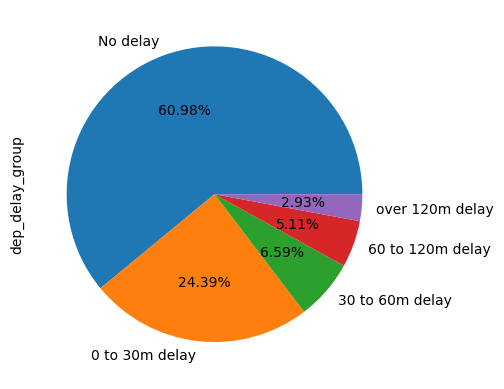

In [60]:
df['dep_delay_group'].value_counts().plot.pie(autopct='%1.2f%%')   

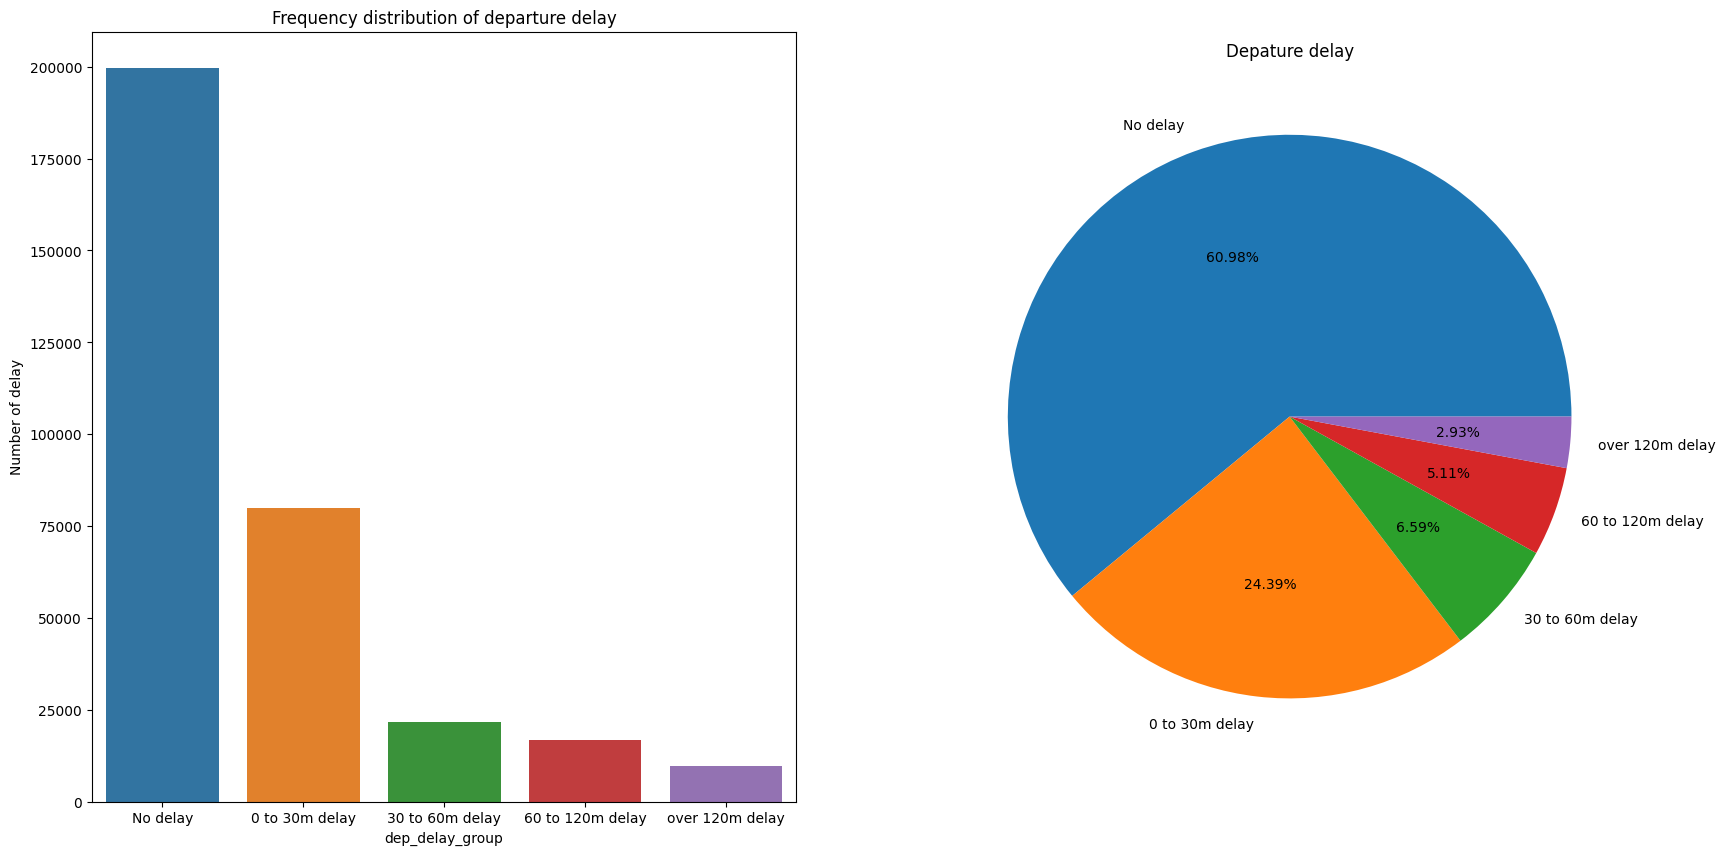

In [61]:
f,ax=plt.subplots(1,2,figsize=(20,10)) #one row, two columns
sns.countplot('dep_delay_group', order = df['dep_delay_group'].value_counts().index, data=df,ax=ax[0])
ax[0].set_title('Frequency distribution of departure delay')
ax[0].set_ylabel('Number of delay')
df['dep_delay_group'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Depature delay')
ax[1].set_ylabel('')
plt.show()

##### Arrival delay status classification

In [62]:
df.arr_delay.sort_values(ascending = False)

7072     1272.00
235778   1127.00
8239     1109.00
327043   1007.00
270376    989.00
           ...  
196935    -74.00
198763    -75.00
195236    -75.00
211124    -79.00
199668    -86.00
Name: arr_delay, Length: 327346, dtype: float64

In [63]:
df["arr_delay_group"] = "No delay" 

In [64]:
mask1 = df['arr_delay'] <= 0
mask2 = (df['arr_delay'] > 0) & (df['arr_delay'] <= 30)
mask3 = (df['arr_delay'] > 30) & (df['arr_delay'] <= 60)
mask4 = (df['arr_delay'] > 60) & (df['arr_delay'] <= 120)
mask5 = df['arr_delay'] > 120

In [65]:
df.loc[mask2, "arr_delay_group"] = "0 to 30m delay"
df.loc[mask3, "arr_delay_group"] = "30 to 60m delay"
df.loc[mask4, "arr_delay_group"] = "60 to 120m delay"
df.loc[mask5, "arr_delay_group"] = "over 120m delay"

In [66]:
df.arr_delay_group.value_counts()

No delay            194342
0 to 30m delay       81505
30 to 60m delay      23710
60 to 120m delay     17755
over 120m delay      10034
Name: arr_delay_group, dtype: int64

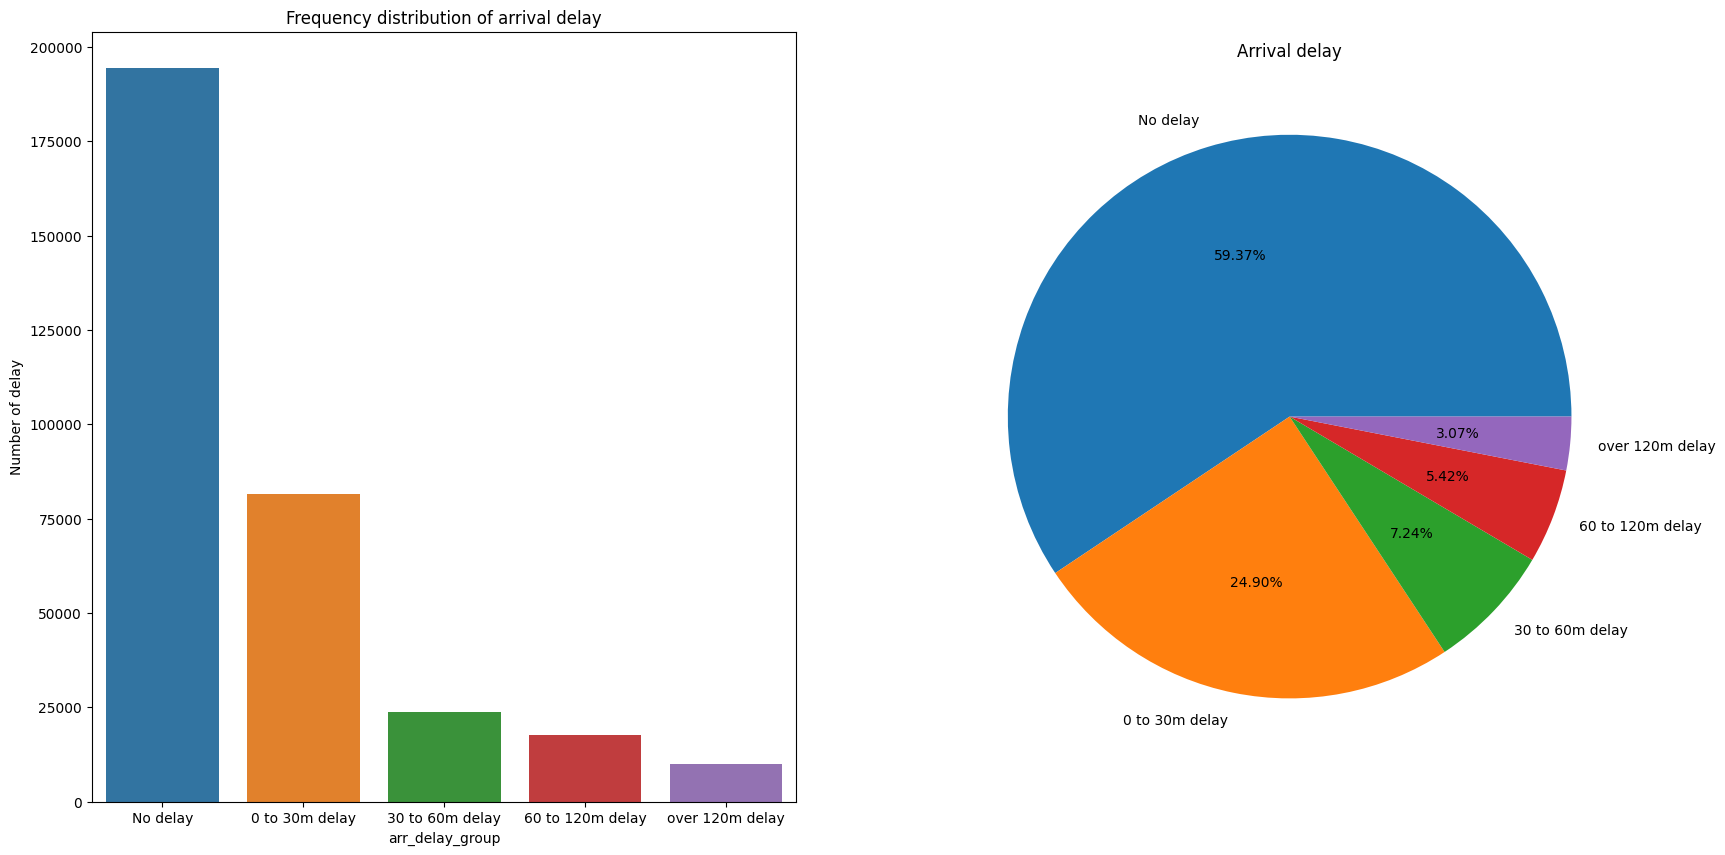

In [67]:
f,ax=plt.subplots(1,2,figsize=(20,10)) #one row, two columns
sns.countplot('arr_delay_group', order = df['arr_delay_group'].value_counts().index, data=df,ax=ax[0])
ax[0].set_title('Frequency distribution of arrival delay')
ax[0].set_ylabel('Number of delay')
df['arr_delay_group'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Arrival delay')
ax[1].set_ylabel('')
plt.show()

##### Average arrival delay among those delayed by carrier 

In [68]:
Delayedflights = df[~(df.arr_delay_group == 'No delay')]

In [69]:
Delayedflights.arr_delay_group.value_counts()

0 to 30m delay      81505
30 to 60m delay     23710
60 to 120m delay    17755
over 120m delay     10034
Name: arr_delay_group, dtype: int64

In [70]:
new_df = Delayedflights.groupby("carrier").arr_delay.mean().sort_values(ascending = False).reset_index()
new_df

,carrier,arr_delay
0,OO,60.60
1,YV,51.08
2,9E,49.27
3,EV,48.27
4,F9,47.58
5,VX,43.85
6,FL,41.09
7,WN,40.75
8,B6,40.01
9,AA,38.27


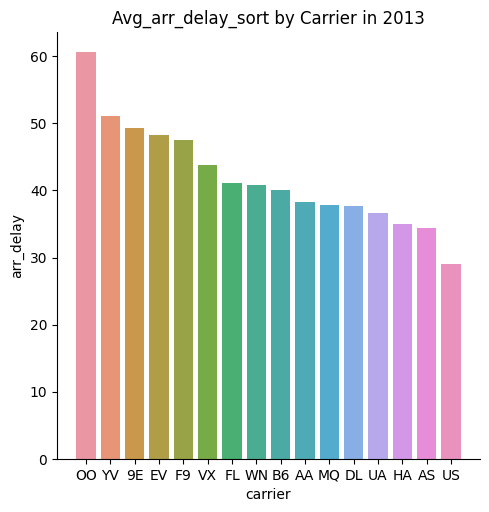

In [71]:
sns.catplot(x='carrier', y='arr_delay', data = new_df, kind='bar')
plt.title("Avg_arr_delay_sort by Carrier in 2013") 
plt.plot()
plt.show()

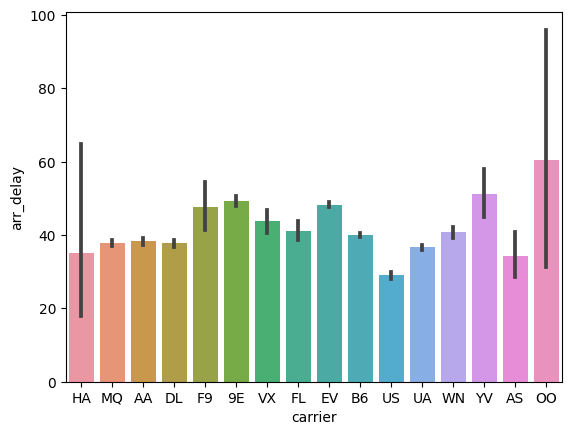

In [72]:
sns.barplot('carrier','arr_delay', data=Delayedflights)
plt.show()

##### Average departure delay among those delayed by carrier 

In [73]:
Delayedflights2 = df[~(df.dep_delay_group == 'No delay')]

In [74]:
Delayedflights2.dep_delay_group.value_counts()

0 to 30m delay      79840
30 to 60m delay     21576
60 to 120m delay    16732
over 120m delay      9597
Name: dep_delay_group, dtype: int64

In [75]:
new_df2 = Delayedflights2.groupby("carrier").dep_delay.mean().sort_values(ascending = False).reset_index()
new_df2

,carrier,dep_delay
0,OO,58.00
1,YV,52.87
2,EV,50.19
3,9E,48.47
4,F9,45.18
5,HA,44.84
6,MQ,44.74
7,FL,40.62
8,B6,39.71
9,DL,37.33


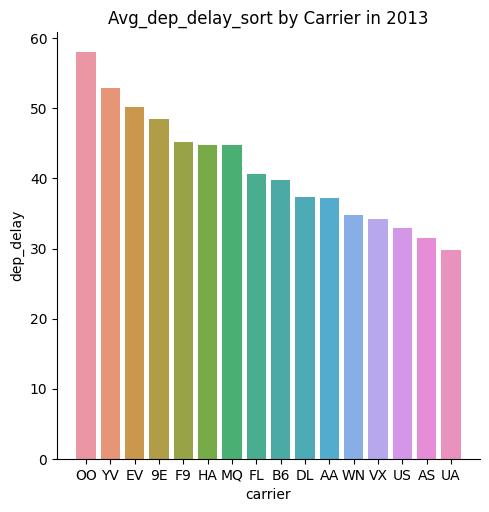

In [76]:
sns.catplot(x='carrier', y='dep_delay', data = new_df2, kind='bar')
plt.title("Avg_dep_delay_sort by Carrier in 2013") 
plt.plot()
plt.show()

##### Average of Airport Departure Delay among those delayed

In [77]:
Delayedflights.groupby("origin").dep_delay.mean().sort_values(ascending = False).reset_index()

,origin,dep_delay
0,EWR,37.65
1,JFK,33.55
2,LGA,31.70


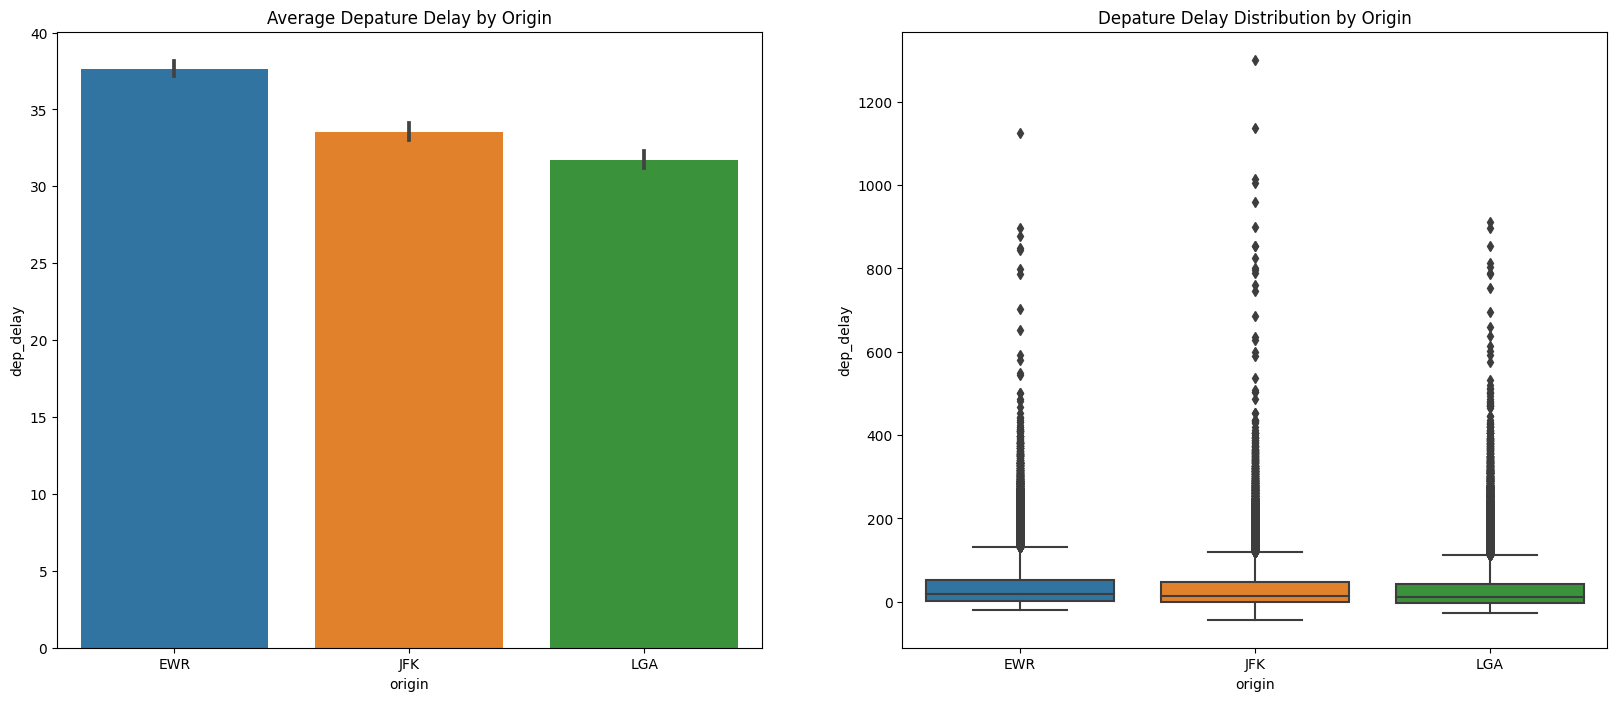

In [78]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('origin','dep_delay', data=Delayedflights,ax=ax[0], order=['EWR', 'JFK', 'LGA'])
                                                                                 
ax[0].set_title('Average Depature Delay by Origin')
sns.boxplot('origin','dep_delay', data=Delayedflights,ax=ax[1], order=['EWR', 'JFK', 'LGA'])
ax[1].set_title('Depature Delay Distribution by Origin')
plt.close(2)
plt.show()

### Groupby

##### The mean of each day's departure delay: the worst day? 

In [79]:
flights_sml.groupby(["year", "month", "day"]).dep_delay.mean()

year  month  day
2013  1      1     11.44
             2     13.68
             3     10.91
             4      8.97
             5      5.73
                    ... 
      12     27    10.96
             28     7.98
             29    22.11
             30    10.71
             31     6.91
Name: dep_delay, Length: 365, dtype: float64

In [80]:
flights_sml.groupby(["year", "month", "day"]).dep_delay.mean().sort_values(ascending = False).nlargest(n = 10)

year  month  day
2013  3      8     83.65
      7      1     56.22
      9      2     53.06
      12     5     52.45
      7      10    51.20
      5      23    50.63
      9      12    49.43
      6      28    49.14
             24    47.54
      7      22    46.67
Name: dep_delay, dtype: float64

##### Variability of distance depending on destination: the biggest variation?

In [81]:
flights.groupby(["dest"]).distance.std().sort_values(ascending = False)

dest
EGE   10.54
SAN   10.35
SFO   10.22
HNL   10.00
SEA    9.98
       ... 
BZN    0.00
BUR    0.00
PSE    0.00
ABQ    0.00
LEX     NaN
Name: distance, Length: 104, dtype: float64

##### The first and last flights of each day

In [82]:
flights.groupby(["year", "month", "day"]).agg(First = ("dep_time", "min"), Last = ("dep_time", "max"))

First    Last
year month day               
2013 1     1   517.00 2356.00
           2    42.00 2354.00
           3    32.00 2349.00
           4    25.00 2358.00
           5    14.00 2357.00
...               ...     ...
     12    27    2.00 2351.00
           28    7.00 2358.00
           29    3.00 2400.00
           30    1.00 2356.00
           31   13.00 2356.00

[365 rows x 2 columns]

##### The number of carriers by destinations: high to low?

In [83]:
flights.groupby(["dest"])["carrier"].nunique().sort_values(ascending = False)

dest
ORD    7
CLT    7
ATL    7
BOS    7
TPA    7
      ..
ILM    1
PVD    1
PSP    1
PSE    1
ABQ    1
Name: carrier, Length: 104, dtype: int64

##### The number of flights by destinations: high to low?

In [84]:
flights.groupby(["dest"]).agg(Flights = ("carrier", "count")).sort_values(by = "Flights", ascending = False)

,Flights
dest,
ATL,16837
ORD,16566
LAX,16026
BOS,15022
MCO,13967
...,...
HDN,14
MTJ,14
SBN,10


##### The number of flights before 5 am

In [85]:
flights.groupby(["year", "month", "day"]).apply(
    lambda x: x[x['dep_time'] < 500]['arr_delay'].count())

year  month  day
2013  1      1      0
             2      3
             3      4
             4      3
             5      3
                   ..
      12     27     7
             28     2
             29     3
             30     6
             31     4
Length: 365, dtype: int64

##### The proportion of flights that are delayed by more than an hour

In [86]:
flight_data_delay_count = flights.groupby(["year", "month", "day"]).arr_delay.count().reset_index()
flight_data_delay_count

,year,month,day,arr_delay
0,2013,1,1,831
1,2013,1,2,928
2,2013,1,3,900
3,2013,1,4,908
4,2013,1,5,717
...,...,...,...,...
360,2013,12,27,961
361,2013,12,28,813
362,2013,12,29,868
363,2013,12,30,953


In [87]:
flight_data_delay_count_added = flights.groupby(["year", "month", "day"]).apply(
    lambda x: x[x['arr_delay'] > 60]['arr_delay'].count()).reset_index()

In [88]:
flight_data_delay_count_added

,year,month,day,0
0,2013,1,1,60
1,2013,1,2,79
2,2013,1,3,51
3,2013,1,4,36
4,2013,1,5,25
...,...,...,...,...
360,2013,12,27,51
361,2013,12,28,31
362,2013,12,29,129
363,2013,12,30,69


In [89]:
flight_data_delay_count_added.iloc[:, 3]

0       60
1       79
2       51
3       36
4       25
      ... 
360     51
361     31
362    129
363     69
364     33
Name: 0, Length: 365, dtype: int64

In [90]:
flight_data_delay_count["daily_delay_mean"] = flight_data_delay_count_added.iloc[:, 3]
flight_data_delay_count

,year,month,day,arr_delay,daily_delay_mean
0,2013,1,1,831,60
1,2013,1,2,928,79
2,2013,1,3,900,51
3,2013,1,4,908,36
4,2013,1,5,717,25
...,...,...,...,...,...
360,2013,12,27,961,51
361,2013,12,28,813,31
362,2013,12,29,868,129
363,2013,12,30,953,69


In [91]:
flight_data_delay_count['proportion'] = flight_data_delay_count['daily_delay_mean']/flight_data_delay_count['arr_delay']*100
flight_data_delay_count

,year,month,day,arr_delay,daily_delay_mean,proportion
0,2013,1,1,831,60,7.22
1,2013,1,2,928,79,8.51
2,2013,1,3,900,51,5.67
3,2013,1,4,908,36,3.96
4,2013,1,5,717,25,3.49
...,...,...,...,...,...,...
360,2013,12,27,961,51,5.31
361,2013,12,28,813,31,3.81
362,2013,12,29,868,129,14.86
363,2013,12,30,953,69,7.24


##### The number of scheduled departures planned by carriers 

In [92]:
flights['carrier'].value_counts()

UA    57782
B6    54049
EV    51108
DL    47658
AA    31947
MQ    25037
US    19831
9E    17294
WN    12044
VX     5116
FL     3175
AS      709
F9      681
YV      544
HA      342
OO       29
Name: carrier, dtype: int64

In [93]:
flights.groupby("carrier").sched_dep_time.count().sort_values(ascending = False)

carrier
UA    57782
B6    54049
EV    51108
DL    47658
AA    31947
MQ    25037
US    19831
9E    17294
WN    12044
VX     5116
FL     3175
AS      709
F9      681
YV      544
HA      342
OO       29
Name: sched_dep_time, dtype: int64

##### The total number of destinations

In [94]:
allflight_NYC = flights['dest'].unique()
allflight_NYC

array(['HNL', 'CMH', 'ORD', 'SFO', 'CVG', 'TPA', 'MSP', 'PDX', 'ATL',
       'MIA', 'BWI', 'DEN', 'LAS', 'SLC', 'STL', 'LAX', 'SAN', 'MSY',
       'IAH', 'MCO', 'CLT', 'DTW', 'SAT', 'DFW', 'IAD', 'SEA', 'CLE',
       'RIC', 'GSO', 'PBI', 'BOS', 'MKE', 'CAK', 'SAV', 'MDW', 'RDU',
       'ROC', 'ORF', 'BUF', 'FLL', 'DCA', 'SJU', 'HOU', 'BTV', 'BNA',
       'MCI', 'SRQ', 'PIT', 'PHX', 'STT', 'MEM', 'SYR', 'OMA', 'AUS',
       'IND', 'DSM', 'MSN', 'PHL', 'JAX', 'MHT', 'GRR', 'BHM', 'ALB',
       'GSP', 'XNA', 'PWM', 'DAY', 'CHS', 'SDF', 'SMF', 'TYS', 'PVD',
       'OKC', 'RSW', 'CHO', 'BDL', 'OAK', 'TUL', 'BGR', 'EGE', 'BUR',
       'TVC', 'SJC', 'MYR', 'AVL', 'BQN', 'ACK', 'LGB', 'SNA', 'CAE',
       'PSE', 'JAC', 'CRW', 'MVY', 'ILM', 'BZN', 'ABQ', 'MTJ', 'ANC',
       'SBN', 'HDN', 'EYW', 'PSP', 'LEX'], dtype=object)

In [95]:
len(allflight_NYC) 

104

##### Total number of unique Airline headed to BOS from NYC

In [96]:
BOS_dest = flights[flights['dest']=='BOS']
BOS_dest

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tail_num,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
173657,2013,4,10,317.00,2000,437.00,414.00,2124,410.00,DL,...,N358NW,JFK,BOS,33.00,187,20,0,2013-04-11T00:00:00Z,2013-04-10,04- April
214614,2013,5,23,2059.00,1409,410.00,2204.00,1517,407.00,B6,...,N197JB,EWR,BOS,45.00,200,14,9,2013-05-23T18:00:00Z,2013-05-23,05- May
210105,2013,5,19,241.00,2000,401.00,355.00,2130,385.00,DL,...,N326US,JFK,BOS,35.00,187,20,0,2013-05-20T00:00:00Z,2013-05-19,05- May
246753,2013,6,27,221.00,2000,381.00,309.00,2129,340.00,B6,...,N354JB,JFK,BOS,34.00,187,20,0,2013-06-28T00:00:00Z,2013-06-27,06- June
259441,2013,7,10,2120.00,1459,381.00,2256.00,1620,396.00,UA,...,N836UA,EWR,BOS,44.00,200,14,59,2013-07-10T18:00:00Z,2013-07-10,07- July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169019,2013,4,5,540.00,601,-21.00,703.00,709,-6.00,B6,...,N329JB,EWR,BOS,44.00,200,6,1,2013-04-05T10:00:00Z,2013-04-05,04- April
112491,2013,2,2,1139.00,1200,-21.00,1234.00,1304,-30.00,B6,...,N279JB,EWR,BOS,37.00,200,12,0,2013-02-02T17:00:00Z,2013-02-02,02- February
66864,2013,11,12,2044.00,2106,-22.00,2143.00,2213,-30.00,B6,...,N317JB,EWR,BOS,40.00,200,21,6,2013-11-13T02:00:00Z,2013-11-12,11- November
309532,2013,9,1,1342.00,1405,-23.00,1448.00,1516,-28.00,B6,...,N279JB,EWR,BOS,47.00,200,14,5,2013-09-01T18:00:00Z,2013-09-01,09- September


In [97]:
BOS_dest['carrier'].unique()

array(['DL', 'B6', 'UA', '9E', 'US', 'AA', 'EV'], dtype=object)

In [98]:
Carrier_count = (BOS_dest['carrier']).unique()
Carrier_count

array(['DL', 'B6', 'UA', '9E', 'US', 'AA', 'EV'], dtype=object)

In [99]:
number = flights.groupby(["dest", "carrier"]).flight.unique().loc["BOS"].index
number

Index(['9E', 'AA', 'B6', 'DL', 'EV', 'UA', 'US'], dtype='object', name='carrier')

In [100]:
len(number)

7

##### The total number of unique aircraft (tailnum) headed to BOS from NYC

In [101]:
len2 = flights.groupby(["dest"]).tail_num.unique().loc["BOS"]
len2

array(['N358NW', 'N197JB', 'N326US', ..., 'N801AY', 'N828JB', 'N14171'],
      dtype=object)

In [102]:
len(len2)

1304

In [103]:
BOS_dest = flights[flights['dest']=='BOS']
BOS_dest

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tail_num,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
173657,2013,4,10,317.00,2000,437.00,414.00,2124,410.00,DL,...,N358NW,JFK,BOS,33.00,187,20,0,2013-04-11T00:00:00Z,2013-04-10,04- April
214614,2013,5,23,2059.00,1409,410.00,2204.00,1517,407.00,B6,...,N197JB,EWR,BOS,45.00,200,14,9,2013-05-23T18:00:00Z,2013-05-23,05- May
210105,2013,5,19,241.00,2000,401.00,355.00,2130,385.00,DL,...,N326US,JFK,BOS,35.00,187,20,0,2013-05-20T00:00:00Z,2013-05-19,05- May
246753,2013,6,27,221.00,2000,381.00,309.00,2129,340.00,B6,...,N354JB,JFK,BOS,34.00,187,20,0,2013-06-28T00:00:00Z,2013-06-27,06- June
259441,2013,7,10,2120.00,1459,381.00,2256.00,1620,396.00,UA,...,N836UA,EWR,BOS,44.00,200,14,59,2013-07-10T18:00:00Z,2013-07-10,07- July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169019,2013,4,5,540.00,601,-21.00,703.00,709,-6.00,B6,...,N329JB,EWR,BOS,44.00,200,6,1,2013-04-05T10:00:00Z,2013-04-05,04- April
112491,2013,2,2,1139.00,1200,-21.00,1234.00,1304,-30.00,B6,...,N279JB,EWR,BOS,37.00,200,12,0,2013-02-02T17:00:00Z,2013-02-02,02- February
66864,2013,11,12,2044.00,2106,-22.00,2143.00,2213,-30.00,B6,...,N317JB,EWR,BOS,40.00,200,21,6,2013-11-13T02:00:00Z,2013-11-12,11- November
309532,2013,9,1,1342.00,1405,-23.00,1448.00,1516,-28.00,B6,...,N279JB,EWR,BOS,47.00,200,14,5,2013-09-01T18:00:00Z,2013-09-01,09- September


In [104]:
number2 = BOS_dest.tail_num.unique()
number2

array(['N358NW', 'N197JB', 'N326US', ..., 'N801AY', 'N828JB', 'N14171'],
      dtype=object)

In [105]:
len(number2)

1304

##### Top_10_arr_delay_arranged by mean for Destination with sample size>1000¶

In [106]:
new_df3 = flights.groupby("dest").arr_delay.count().reset_index()
new_df3

,dest,arr_delay
0,ABQ,254
1,ACK,264
2,ALB,418
3,ANC,8
4,ATL,16837
...,...,...
99,TPA,7390
100,TUL,294
101,TVC,95
102,TYS,578


In [107]:
mask1 = new_df3.arr_delay > 1000
mask1

0      False
1      False
2      False
3      False
4       True
       ...  
99      True
100    False
101    False
102    False
103    False
Name: arr_delay, Length: 104, dtype: bool

In [108]:
new_df4 = new_df3.loc[mask1].copy()
new_df4

,dest,arr_delay
4,ATL,16837
5,AUS,2411
10,BNA,6084
11,BOS,15022
13,BTV,2510
14,BUF,4570
16,BWI,1687
21,CHS,2759
22,CLE,4394
23,CLT,13674


In [109]:
inner_join_first = flights.merge(new_df4, on='dest')
inner_join_first

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay_x,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc,arr_delay_y
0,2013,6,15,1432.00,1935,1137.00,1607.00,2120,1127.00,MQ,...,JFK,CMH,74.00,483,19,35,2013-06-15T23:00:00Z,2013-06-15,06- June,3326
1,2013,12,9,1837.00,1229,368.00,2029.00,1413,376.00,EV,...,EWR,CMH,89.00,463,12,29,2013-12-09T17:00:00Z,2013-12-09,12- December,3326
2,2013,4,19,2352.00,1810,342.00,149.00,2000,349.00,MQ,...,LGA,CMH,78.00,479,18,10,2013-04-19T22:00:00Z,2013-04-19,04- April,3326
3,2013,8,8,2325.00,1800,325.00,105.00,1950,315.00,MQ,...,LGA,CMH,70.00,479,18,0,2013-08-08T22:00:00Z,2013-08-08,08- August,3326
4,2013,4,24,116.00,2005,311.00,259.00,2200,299.00,MQ,...,LGA,CMH,82.00,479,20,5,2013-04-25T00:00:00Z,2013-04-24,04- April,3326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309644,2013,11,10,1300.00,1315,-15.00,1609.00,1630,-21.00,B6,...,LGA,RSW,165.00,1080,13,15,2013-11-10T18:00:00Z,2013-11-10,11- November,3502
309645,2013,9,6,744.00,800,-16.00,1046.00,1110,-24.00,B6,...,EWR,RSW,156.00,1068,8,0,2013-09-06T12:00:00Z,2013-09-06,09- September,3502
309646,2013,3,4,1909.00,1925,-16.00,2219.00,2236,-17.00,B6,...,JFK,RSW,155.00,1074,19,25,2013-03-05T00:00:00Z,2013-03-04,03- March,3502
309647,2013,4,1,913.00,930,-17.00,1232.00,1244,-12.00,B6,...,LGA,RSW,163.00,1080,9,30,2013-04-01T13:00:00Z,2013-04-01,04- April,3502


In [110]:
topdest = flights[flights['dest'].isin(inner_join_first['dest'])]
topdest

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tail_num,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
235778,2013,6,15,1432.00,1935,1137.00,1607.00,2120,1127.00,MQ,...,N504MQ,JFK,CMH,74.00,483,19,35,2013-06-15T23:00:00Z,2013-06-15,06- June
8239,2013,1,10,1121.00,1635,1126.00,1239.00,1810,1109.00,MQ,...,N517MQ,EWR,ORD,111.00,719,16,35,2013-01-10T21:00:00Z,2013-01-10,01- January
327043,2013,9,20,1139.00,1845,1014.00,1457.00,2210,1007.00,AA,...,N338AA,JFK,SFO,354.00,2586,18,45,2013-09-20T22:00:00Z,2013-09-20,09- September
270376,2013,7,22,845.00,1600,1005.00,1044.00,1815,989.00,MQ,...,N665MQ,JFK,CVG,96.00,589,16,0,2013-07-22T20:00:00Z,2013-07-22,07- July
173992,2013,4,10,1100.00,1900,960.00,1342.00,2211,931.00,DL,...,N959DL,JFK,TPA,139.00,1005,19,0,2013-04-10T23:00:00Z,2013-04-10,04- April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24915,2013,1,29,1703.00,1730,-27.00,1947.00,1957,-10.00,F9,...,N208FR,LGA,DEN,250.00,1620,17,30,2013-01-29T22:00:00Z,2013-01-29,01- January
9619,2013,1,11,1900.00,1930,-30.00,2233.00,2243,-10.00,DL,...,N934DL,LGA,TPA,139.00,1010,19,30,2013-01-12T00:00:00Z,2013-01-11,01- January
64501,2013,11,10,1408.00,1440,-32.00,1549.00,1559,-10.00,EV,...,N825AS,LGA,IAD,52.00,229,14,40,2013-11-10T19:00:00Z,2013-11-10,11- November
113633,2013,2,3,2022.00,2055,-33.00,2240.00,2338,-58.00,DL,...,N612DL,LGA,MSY,162.00,1183,20,55,2013-02-04T01:00:00Z,2013-02-03,02- February


In [111]:
topdest.groupby("dest").arr_delay.mean().sort_values(ascending = False).head(10).reset_index()

,dest,arr_delay
0,RIC,20.11
1,CVG,15.36
2,MCI,14.51
3,MKE,14.17
4,GSO,14.11
5,IAD,13.86
6,DAY,12.68
7,SDF,12.67
8,MDW,12.36
9,JAX,11.84


## Concatonating and merging

##### Average delay drawn from the entire observations

In [112]:
flight_data_dep_delay = flights.groupby(["year", "month", "day"]).dep_delay.mean()
flight_data_dep_delay

year  month  day
2013  1      1     11.44
             2     13.68
             3     10.91
             4      8.97
             5      5.73
                    ... 
      12     27    10.96
             28     7.98
             29    22.11
             30    10.71
             31     6.91
Name: dep_delay, Length: 365, dtype: float64

##### Average delay drawn from the positive observations

In [113]:
flight_data_condition = flights.groupby(["year", "month", "day"]).apply(
    lambda x: x[x['dep_delay'] > 0]['dep_delay'].mean())
flight_data_condition

year  month  day
2013  1      1     32.60
             2     32.39
             3     28.27
             4     26.21
             5     21.85
                    ... 
      12     27    28.28
             28    24.74
             29    42.50
             30    29.91
             31    26.09
Length: 365, dtype: float64

##### Concatonation

In [114]:
pd.concat([flight_data_dep_delay, flight_data_condition], axis = 1, keys = ["dep_delay1", "dep_delay2"]).reset_index()

,year,month,day,dep_delay1,dep_delay2
0,2013,1,1,11.44,32.60
1,2013,1,2,13.68,32.39
2,2013,1,3,10.91,28.27
3,2013,1,4,8.97,26.21
4,2013,1,5,5.73,21.85
...,...,...,...,...,...
360,2013,12,27,10.96,28.28
361,2013,12,28,7.98,24.74
362,2013,12,29,22.11,42.50
363,2013,12,30,10.71,29.91


# Visualization

## Pie chart & countplot

##### Graphical representation of carriers scheduled flights in numbers and %

In [115]:
new_df = flights.groupby("carrier").sched_dep_time.count().sort_values(ascending = False).reset_index()
new_df

,carrier,sched_dep_time
0,UA,57782
1,B6,54049
2,EV,51108
3,DL,47658
4,AA,31947
5,MQ,25037
6,US,19831
7,9E,17294
8,WN,12044
9,VX,5116


In [116]:
new_df['dep_pct'] = new_df.sched_dep_time / new_df.sched_dep_time.sum()

In [117]:
new_df

,carrier,sched_dep_time,dep_pct
0,UA,57782,0.18
1,B6,54049,0.17
2,EV,51108,0.16
3,DL,47658,0.15
4,AA,31947,0.10
5,MQ,25037,0.08
6,US,19831,0.06
7,9E,17294,0.05
8,WN,12044,0.04
9,VX,5116,0.02


- Pie chart

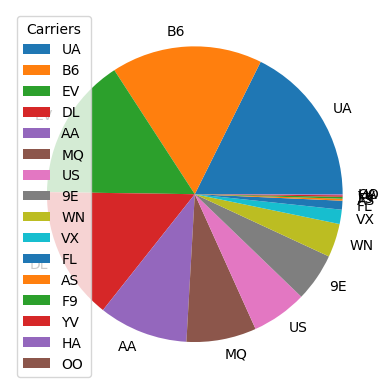

In [118]:
plt.pie(new_df.dep_pct, labels = new_df.carrier)
plt.legend(title = "Carriers")
plt.show() 

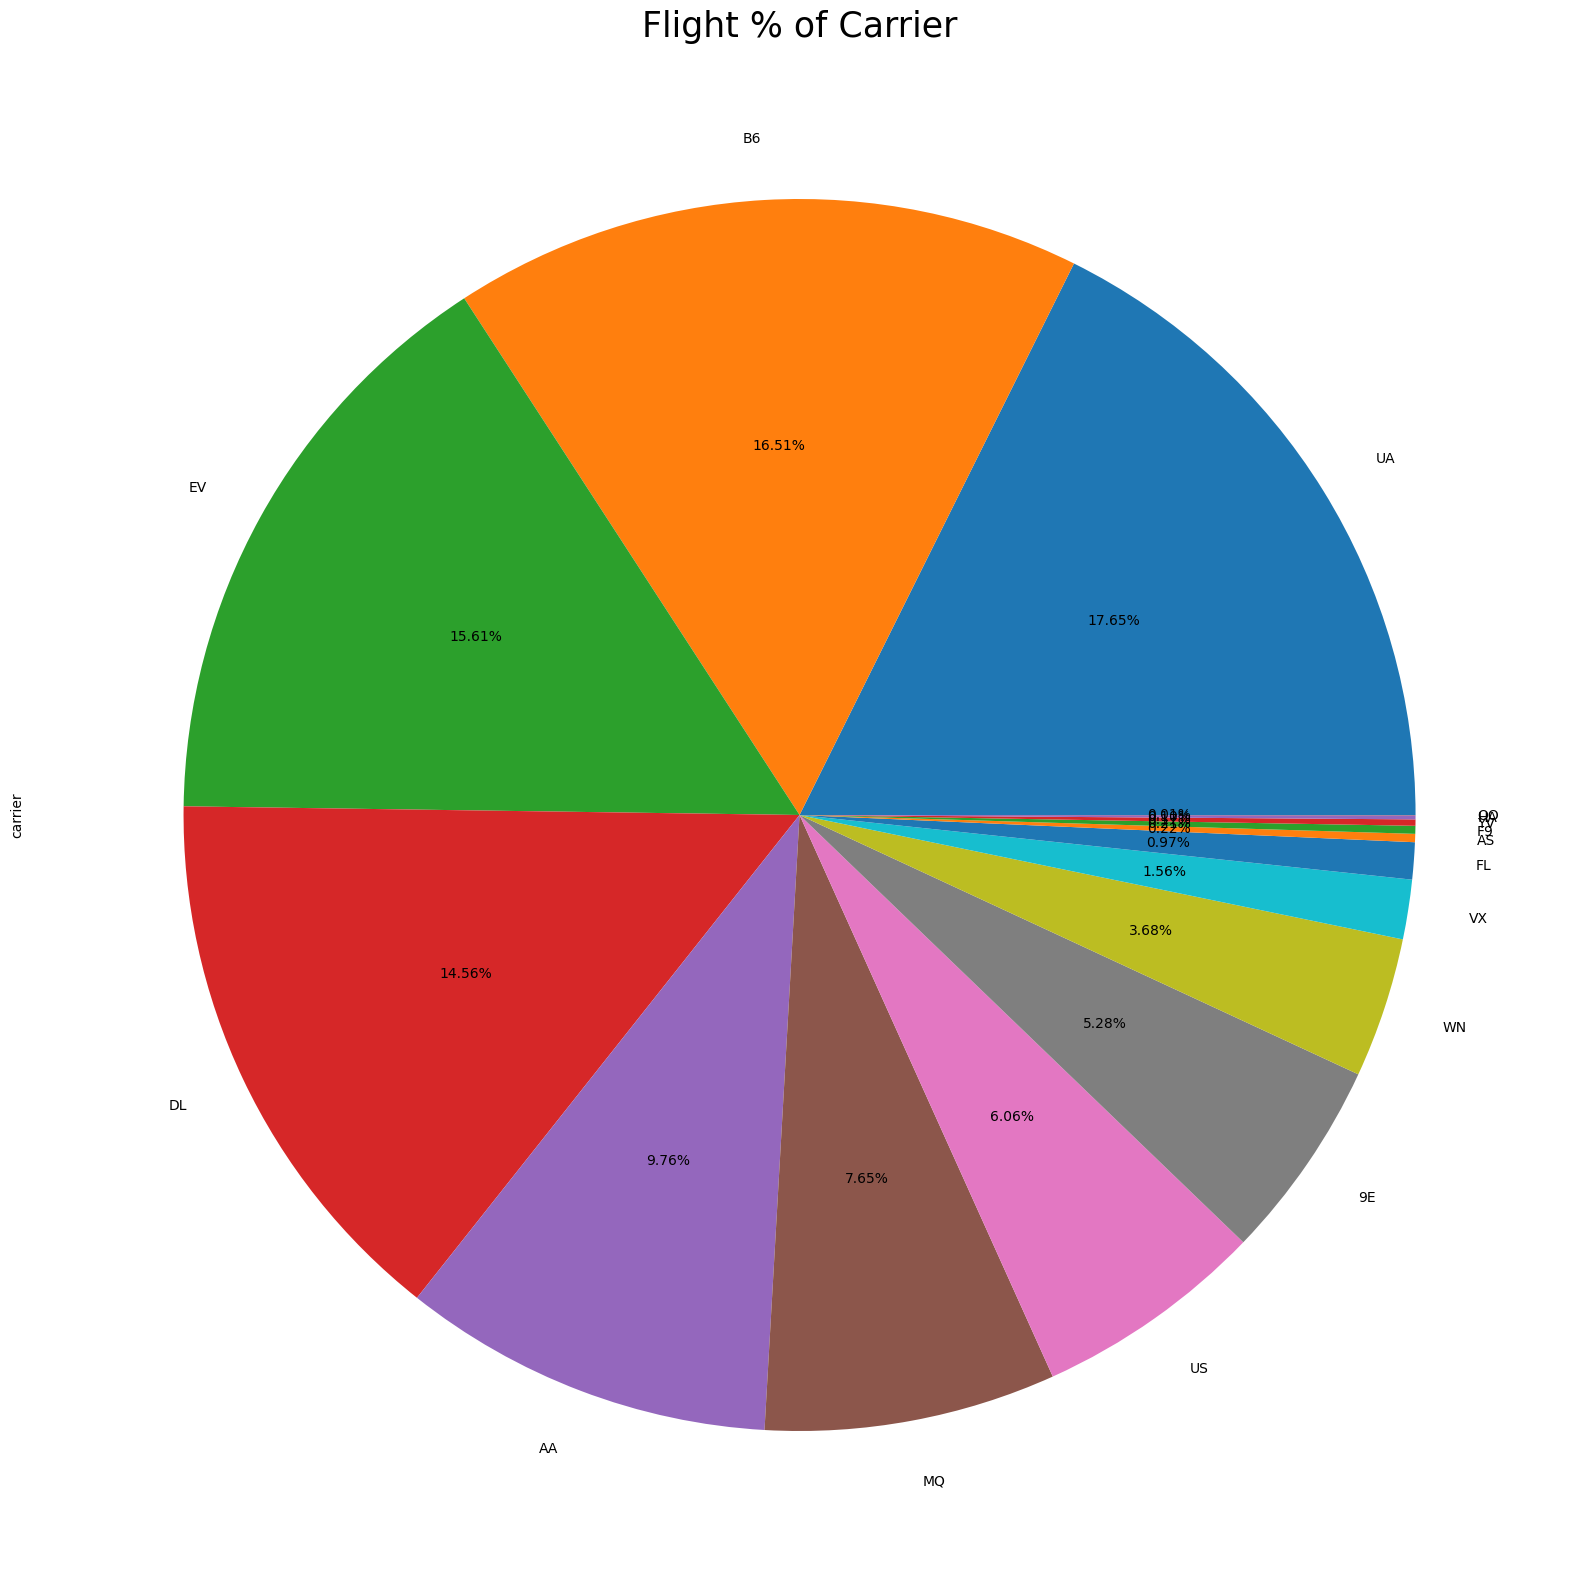

In [119]:
figsize=(20,10)
flights['carrier'].value_counts().plot.pie(autopct='%1.2f%%', figsize=(30,20))
plt.title("Flight % of Carrier", fontsize = 25)
plt.show()

- Countplot

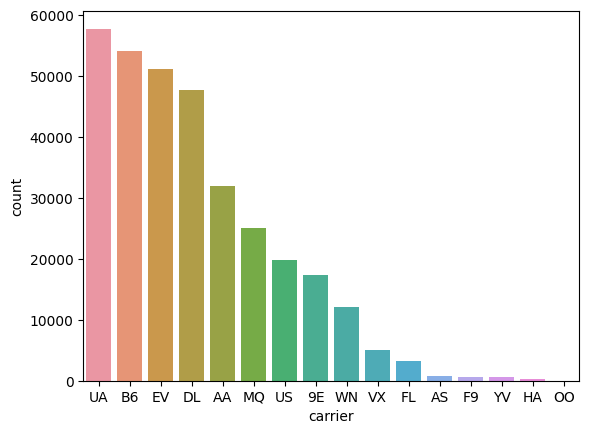

In [120]:
sns.countplot('carrier',order = flights['carrier'].value_counts().index, data=flights)
plt.show()

- Pie chart & countplot

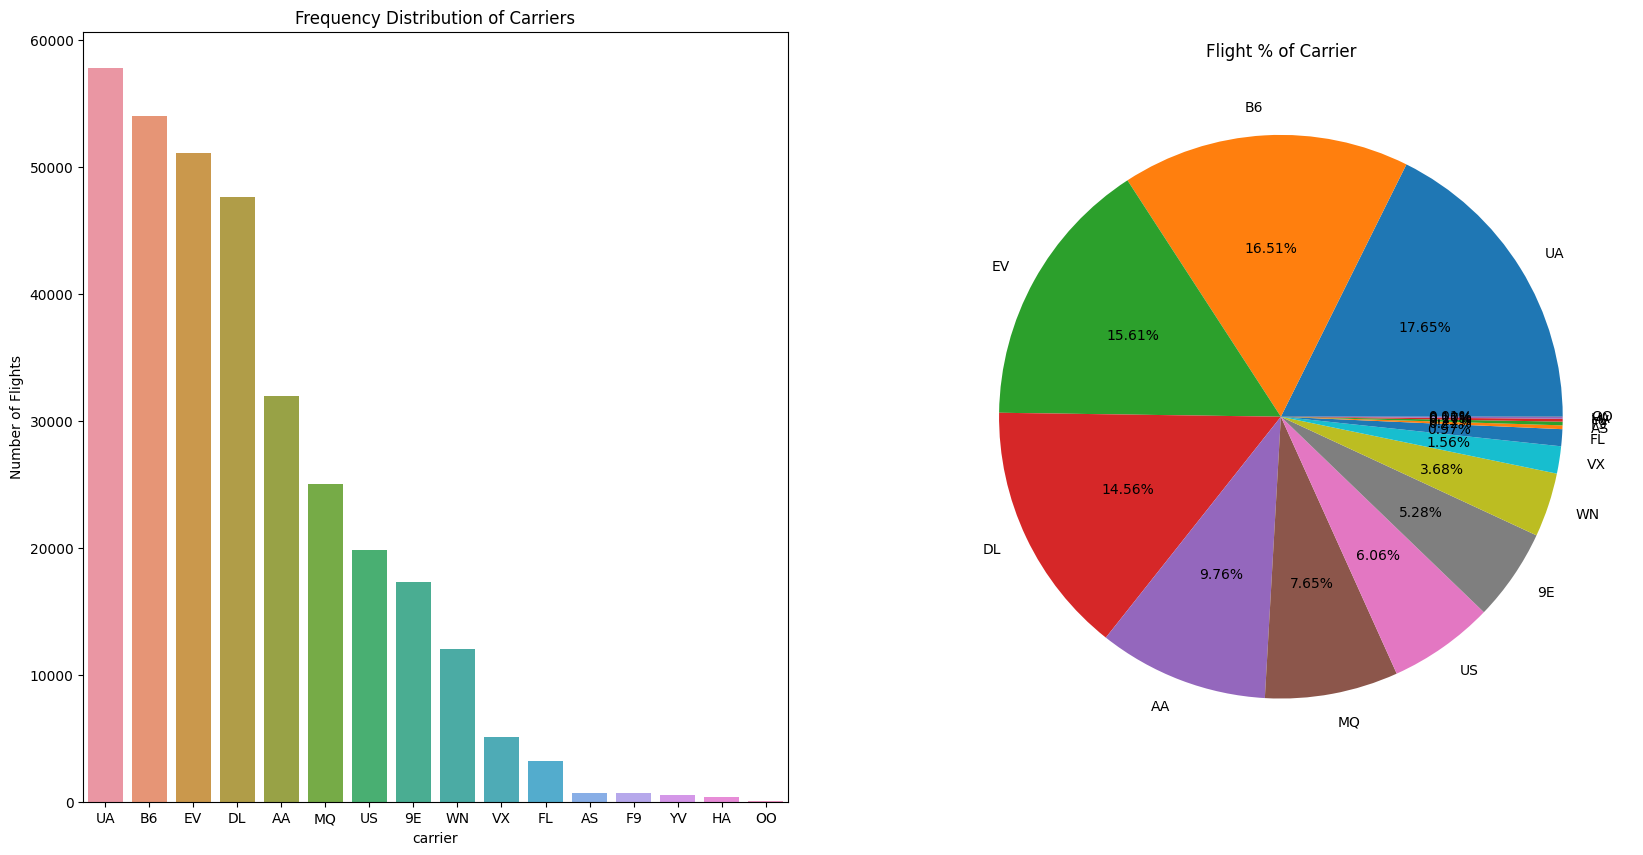

In [121]:
f,ax=plt.subplots(1,2,figsize=(20,10)) #one row, two columns
sns.countplot('carrier',order = flights['carrier'].value_counts().index, data=flights,ax=ax[0])
ax[0].set_title('Frequency Distribution of Carriers')
ax[0].set_ylabel('Number of Flights')
flights['carrier'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Flight % of Carrier')
ax[1].set_ylabel('')
plt.show()

## Histogram

##### Overall pattern of departure time from NYC airports (grouped by origin)¶

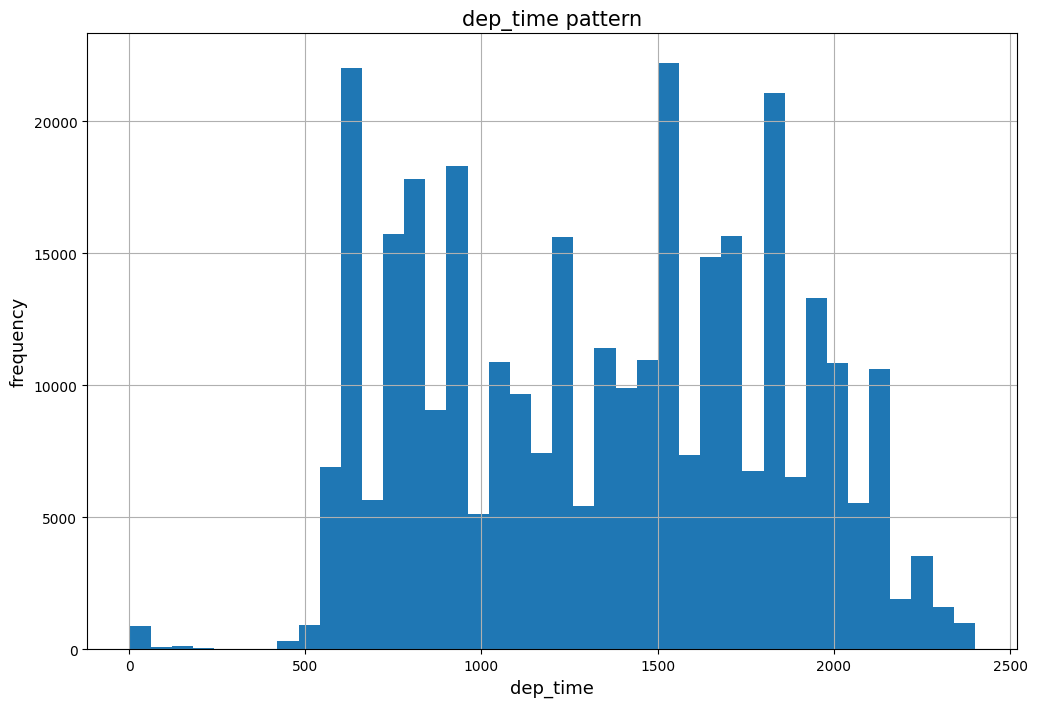

In [122]:
flights.dep_time.hist(figsize = (12,8), bins = 40 )
plt.title("dep_time pattern", fontsize = 15)
plt.xlabel("dep_time", fontsize = 13)
plt.ylabel("frequency", fontsize = 13)
plt.show()

#####  Histogram for arrival and departure delay

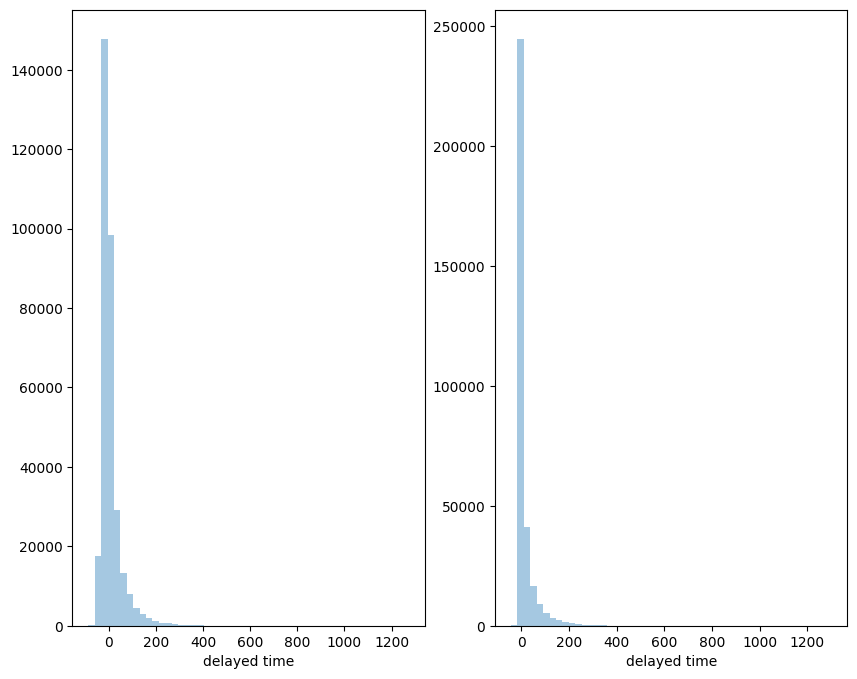

In [123]:
f,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(flights['arr_delay'], kde = False, ax=ax[0])
ax[0].set_xlabel('delayed time', fontsize=10)
sns.distplot(flights['dep_delay'], kde = False, ax=ax[1])
ax[1].set_xlabel('delayed time', fontsize=10)
plt.close(2)
plt.show()

## Boxplot

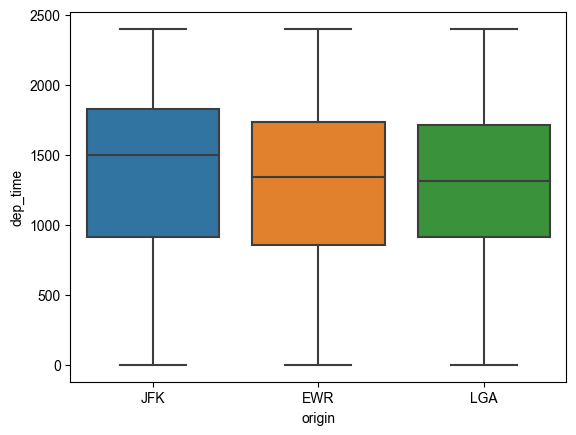

In [124]:
sns.boxplot(data= flights, x='origin', y='dep_time')
sns.set(rc={'figure.figsize':(5, 5)})
plt.show()
#The highest IQ range (900 to 1800) is for JFK, where 75% flights are falling under the departure time of 1800 and middle data point for departure is 1500 

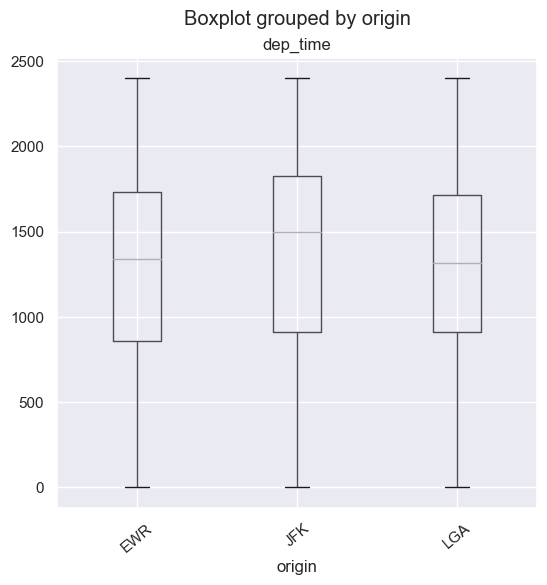

In [125]:
flights.boxplot('dep_time','origin', rot = 40, figsize=(6,6))
plt.show()

## Strip plot

##### Top5 destination where flight arrives earlier than expected arrival time

In [126]:
Ontime_Early_flights = flights[(flights.arr_delay <= 0)]
Ontime_Early_flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tail_num,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
260493,2013,7,11,2018.00,1915,63.00,2210.00,2211,-1.00,DL,...,N3751B,JFK,LAS,273.00,2248,19,15,2013-07-11T23:00:00Z,2013-07-11,07- July
205215,2013,5,13,1756.00,1655,61.00,2020.00,2020,0.00,VX,...,N637VA,JFK,LAX,302.00,2475,16,55,2013-05-13T20:00:00Z,2013-05-13,05- May
169277,2013,4,5,932.00,831,61.00,1149.00,1151,-2.00,UA,...,N57852,EWR,LAX,301.00,2454,8,31,2013-04-05T12:00:00Z,2013-04-05,04- April
133681,2013,2,26,1000.00,900,60.00,1513.00,1540,-27.00,HA,...,N382HA,JFK,HNL,584.00,4983,9,0,2013-02-26T14:00:00Z,2013-02-26,02- February
263187,2013,7,14,1833.00,1735,58.00,2108.00,2108,0.00,DL,...,N702TW,JFK,SEA,315.00,2422,17,35,2013-07-14T21:00:00Z,2013-07-14,07- July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48335,2013,10,23,1907.00,1932,-25.00,2143.00,2143,0.00,EV,...,N13994,EWR,TYS,111.00,631,19,32,2013-10-23T23:00:00Z,2013-10-23,10- October
24915,2013,1,29,1703.00,1730,-27.00,1947.00,1957,-10.00,F9,...,N208FR,LGA,DEN,250.00,1620,17,30,2013-01-29T22:00:00Z,2013-01-29,01- January
9619,2013,1,11,1900.00,1930,-30.00,2233.00,2243,-10.00,DL,...,N934DL,LGA,TPA,139.00,1010,19,30,2013-01-12T00:00:00Z,2013-01-11,01- January
64501,2013,11,10,1408.00,1440,-32.00,1549.00,1559,-10.00,EV,...,N825AS,LGA,IAD,52.00,229,14,40,2013-11-10T19:00:00Z,2013-11-10,11- November


In [127]:
Ontime_Early_flights.groupby("dest").arr_delay.mean().sort_values(ascending = True).reset_index()
#averaged early flight for each dest

,dest,arr_delay
0,ANC,-27.33
1,ABQ,-22.95
2,PSP,-22.08
3,SAT,-22.06
4,LEX,-22.00
...,...,...
99,BQN,-11.73
100,AVL,-11.14
101,ACK,-10.58
102,SBN,-10.00


In [128]:
top10flight = Ontime_Early_flights.sort_values(by = 'arr_delay', ascending=True).head(10)
top10flight
#top10 early flight info

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tail_num,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
199668,2013,5,7,1715.00,1729,-14.00,1944.00,2110,-86.00,VX,...,N843VA,EWR,SFO,315.00,2565,17,29,2013-05-07T21:00:00Z,2013-05-07,05- May
211124,2013,5,20,719.00,735,-16.00,951.00,1110,-79.00,VX,...,N840VA,JFK,SFO,316.00,2586,7,35,2013-05-20T11:00:00Z,2013-05-20,05- May
198763,2013,5,6,1826.00,1830,-4.00,2045.00,2200,-75.00,AA,...,N3KCAA,JFK,SEA,289.00,2422,18,30,2013-05-06T22:00:00Z,2013-05-06,05- May
195236,2013,5,2,1947.00,1949,-2.00,2209.00,2324,-75.00,UA,...,N851UA,EWR,LAX,300.00,2454,19,49,2013-05-02T23:00:00Z,2013-05-02,05- May
196935,2013,5,4,1816.00,1820,-4.00,2017.00,2131,-74.00,AS,...,N551AS,EWR,SEA,281.00,2402,18,20,2013-05-04T22:00:00Z,2013-05-04,05- May
195218,2013,5,2,1926.00,1929,-3.00,2157.00,2310,-73.00,UA,...,N24212,EWR,SFO,314.00,2565,19,29,2013-05-02T23:00:00Z,2013-05-02,05- May
204579,2013,5,13,657.00,700,-3.00,908.00,1019,-71.00,B6,...,N805JB,JFK,LAX,290.00,2475,7,0,2013-05-13T11:00:00Z,2013-05-13,05- May
199882,2013,5,7,2054.00,2055,-1.00,2317.00,28,-71.00,UA,...,N806UA,EWR,SFO,309.00,2565,20,55,2013-05-08T00:00:00Z,2013-05-07,05- May
198728,2013,5,6,1753.00,1755,-2.00,2004.00,2115,-71.00,DL,...,N3760C,JFK,PDX,283.00,2454,17,55,2013-05-06T21:00:00Z,2013-05-06,05- May
205219,2013,5,13,1801.00,1805,-4.00,2018.00,2128,-70.00,B6,...,N663JB,JFK,LGB,295.00,2465,18,5,2013-05-13T22:00:00Z,2013-05-13,05- May


In [129]:
top10flight_details = pd.DataFrame(top10flight, columns=['day','month','origin','dest','arr_delay','carrier','flight','tailnum','distance','flight_speed'])
top10flight_details

,day,month,origin,dest,arr_delay,carrier,flight,tailnum,distance,flight_speed
199668,7,5,EWR,SFO,-86.00,VX,193,NaN,2565,NaN
211124,20,5,JFK,SFO,-79.00,VX,11,NaN,2586,NaN
198763,6,5,JFK,SEA,-75.00,AA,269,NaN,2422,NaN
195236,2,5,EWR,LAX,-75.00,UA,612,NaN,2454,NaN
196935,4,5,EWR,SEA,-74.00,AS,7,NaN,2402,NaN
195218,2,5,EWR,SFO,-73.00,UA,1628,NaN,2565,NaN
204579,13,5,JFK,LAX,-71.00,B6,671,NaN,2475,NaN
199882,7,5,EWR,SFO,-71.00,UA,622,NaN,2565,NaN
198728,6,5,JFK,PDX,-71.00,DL,1394,NaN,2454,NaN
205219,13,5,JFK,LGB,-70.00,B6,217,NaN,2465,NaN


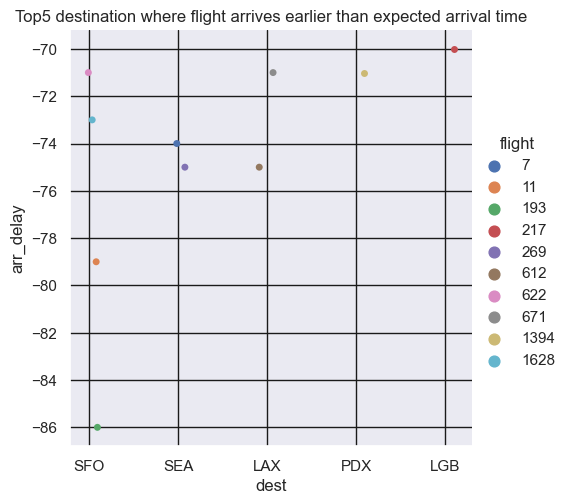

In [130]:
sns.catplot(x='dest', y='arr_delay', data = top10flight_details, kind='strip', hue='flight')
plt.title("Top5 destination where flight arrives earlier than expected arrival time") 
plt.grid(True, color='k')
plt.plot()
plt.show()

## Bar graph

##### Top10 destination flight from NYC in bar graph

In [131]:
top10_alt = flights.dest.value_counts().head(10).reset_index()
top10_alt

,index,dest
0,ATL,16837
1,ORD,16566
2,LAX,16026
3,BOS,15022
4,MCO,13967
5,CLT,13674
6,SFO,13173
7,FLL,11897
8,MIA,11593
9,DCA,9111


In [132]:
top10 = flights.groupby("dest").flight.count().sort_values(ascending = False).nlargest(n = 10)#.reset_index()
top10

dest
ATL    16837
ORD    16566
LAX    16026
BOS    15022
MCO    13967
CLT    13674
SFO    13173
FLL    11897
MIA    11593
DCA     9111
Name: flight, dtype: int64

In [133]:
from plotnine import *
from plotnine.data import *

%matplotlib inline

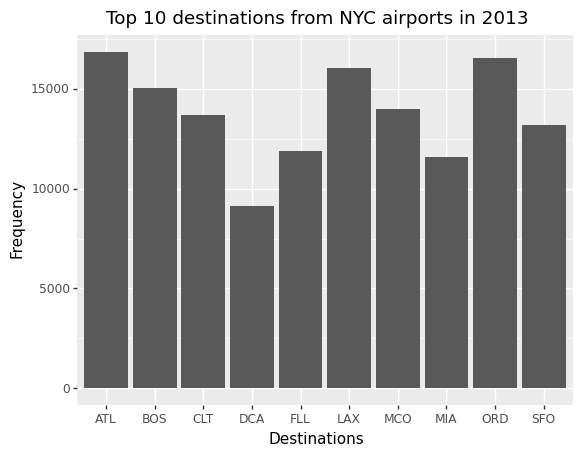

<ggplot: (185573012252)>

In [134]:
p = ggplot(data = top10_alt, mapping = aes(x = "index", y = "dest")) 
p + geom_bar(stat="identity") + labs(
    title= "Top 10 destinations from NYC airports in 2013", 
         x="Destinations", y = "Frequency")

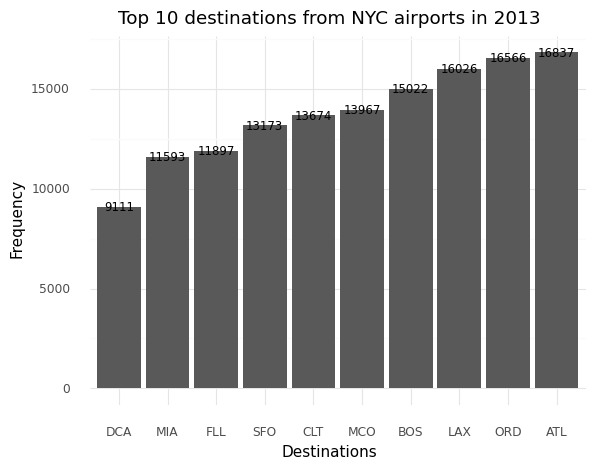

<ggplot: (185573064970)>

In [135]:
p = ggplot(data = top10_alt, mapping = aes(x = "reorder(index, dest)", y = "dest")) 
p + geom_bar(stat="identity") + labs(
    title= "Top 10 destinations from NYC airports in 2013", 
         x="Destinations", y = "Frequency") + geom_text(aes(label = "dest"),
            position = position_dodge(.1), size=8.5) + theme_minimal()

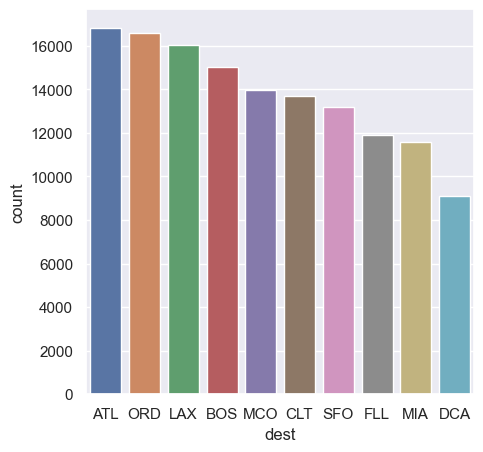

In [136]:
sns.countplot('dest', order = flights['dest'].sort_values(ascending=False).value_counts().head(10).index, data=flights)
plt.show()

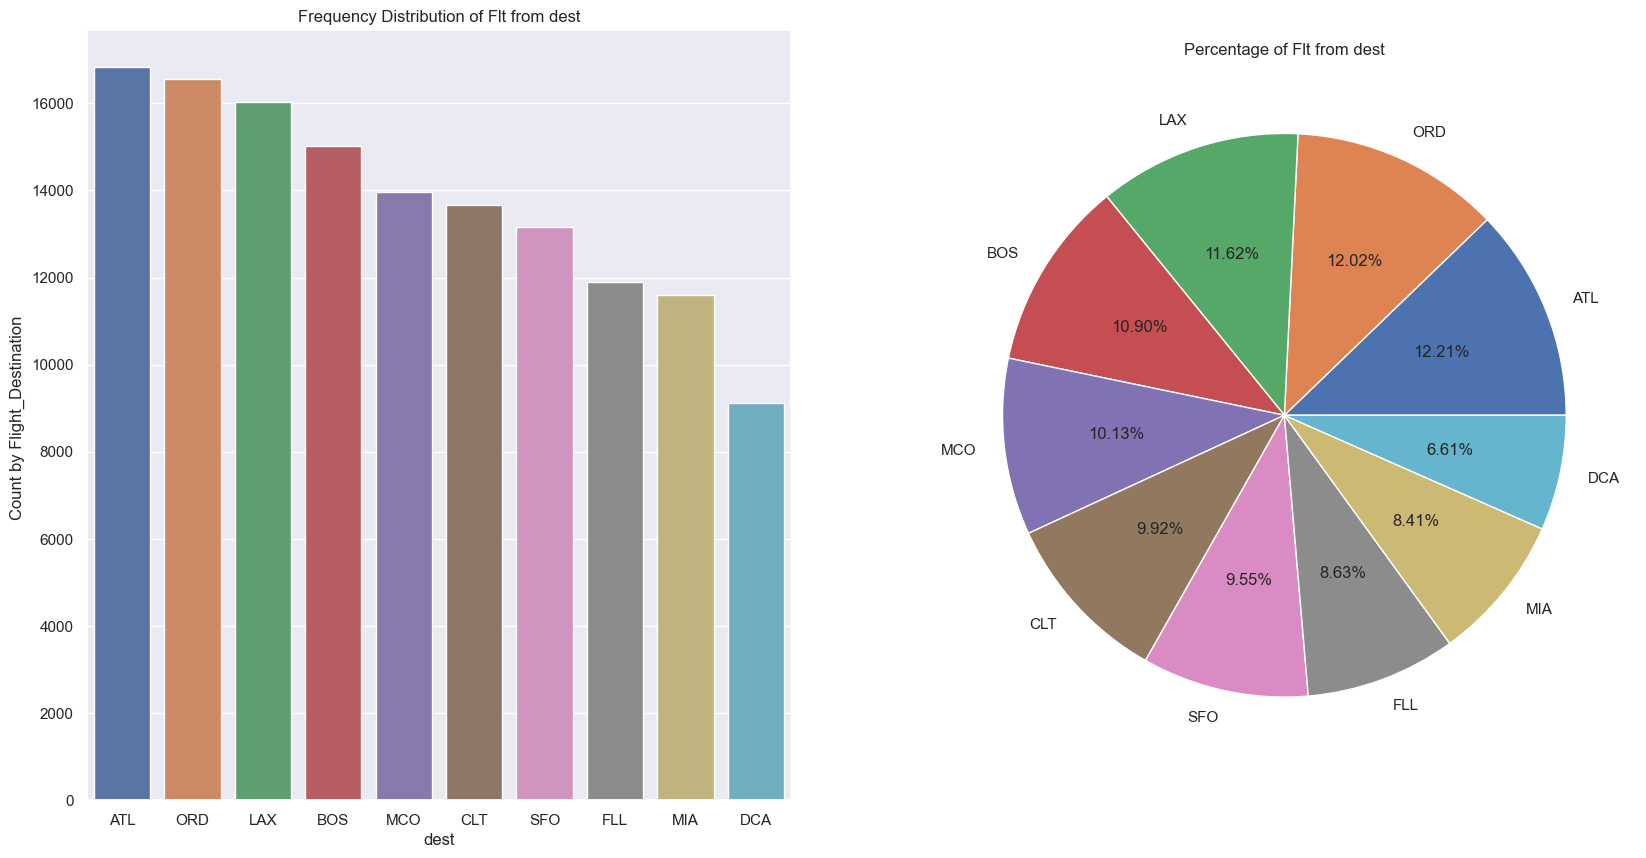

In [137]:
f,ax=plt.subplots(1,2,figsize=(20,10))
flights['dest'].value_counts().head(10).sort_values(ascending=False).plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                
ax[1].set_title('Percentage of Flt from dest')
ax[1].set_ylabel('')
sns.countplot('dest', order = flights['dest'].sort_values(ascending=False).value_counts().head(10).index, data=flights,ax=ax[0])
ax[0].set_title('Frequency Distribution of Flt from dest')
ax[0].set_ylabel('Count by Flight_Destination ')
plt.show()

##### Avg. Monthly Departure Delay for Carrier

In [138]:
flights.groupby(["carrier", "year", "month"]).dep_delay.mean()

carrier  year  month
9E       2013  1       16.58
               2       16.39
               3       13.28
               4       13.45
               5       22.64
                        ... 
YV       2013  8       19.07
               9        8.88
               10      20.00
               11      10.52
               12      11.74
Name: dep_delay, Length: 185, dtype: float64

In [139]:
month_data = flights.groupby(["year", "month"]).dep_delay.mean().reset_index()
month_data

,year,month,dep_delay
0,2013,1,9.99
1,2013,2,10.76
2,2013,3,13.16
3,2013,4,13.85
4,2013,5,12.89
5,2013,6,20.73
6,2013,7,21.52
7,2013,8,12.57
8,2013,9,6.63
9,2013,10,6.23


In [140]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [141]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

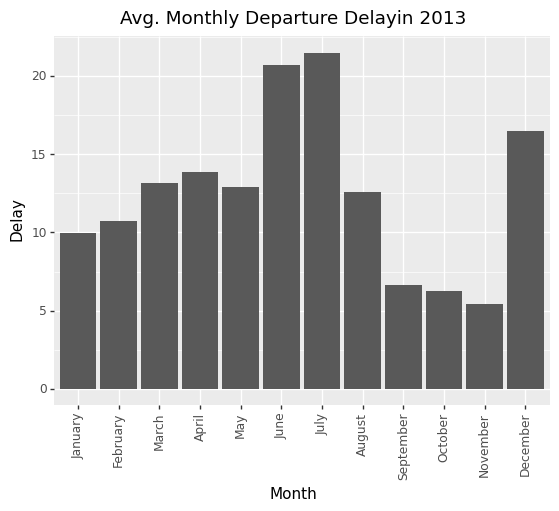

<ggplot: (185573294276)>

In [142]:
p = ggplot(data = month_data, mapping = aes(x = "month", y = "dep_delay")) 
p + geom_bar(stat="identity") + labs(
    title= "Avg. Monthly Departure Delayin 2013", 
         x="Month", y = "Delay") + scale_x_discrete(limits= months) + theme(axis_text_x = element_text(angle=90))

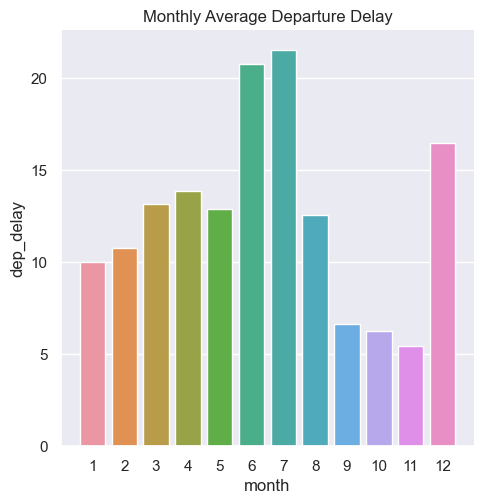

In [143]:
sns.catplot(x='month', y='dep_delay',data=month_data, kind='bar')
plt.title("Monthly Average Departure Delay") 
plt.plot()
plt.show()

##### Avg_arr_delay_sort by Carrier in 2013 (inclusive early arrival)

In [144]:
new_df = flights.groupby("carrier").arr_delay.mean().sort_values(ascending = False).reset_index()
new_df

,carrier,arr_delay
0,F9,21.92
1,FL,20.12
2,EV,15.80
3,YV,15.56
4,OO,11.93
5,MQ,10.77
6,WN,9.65
7,B6,9.46
8,9E,7.38
9,UA,3.56


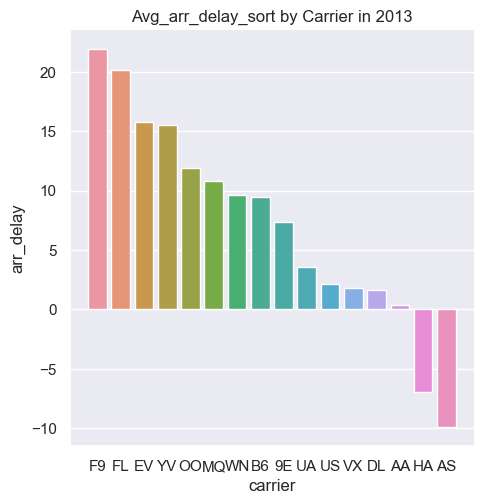

In [145]:
sns.catplot(x='carrier', y='arr_delay',data=new_df, kind='bar')
plt.title("Avg_arr_delay_sort by Carrier in 2013") 
plt.plot()
plt.show()

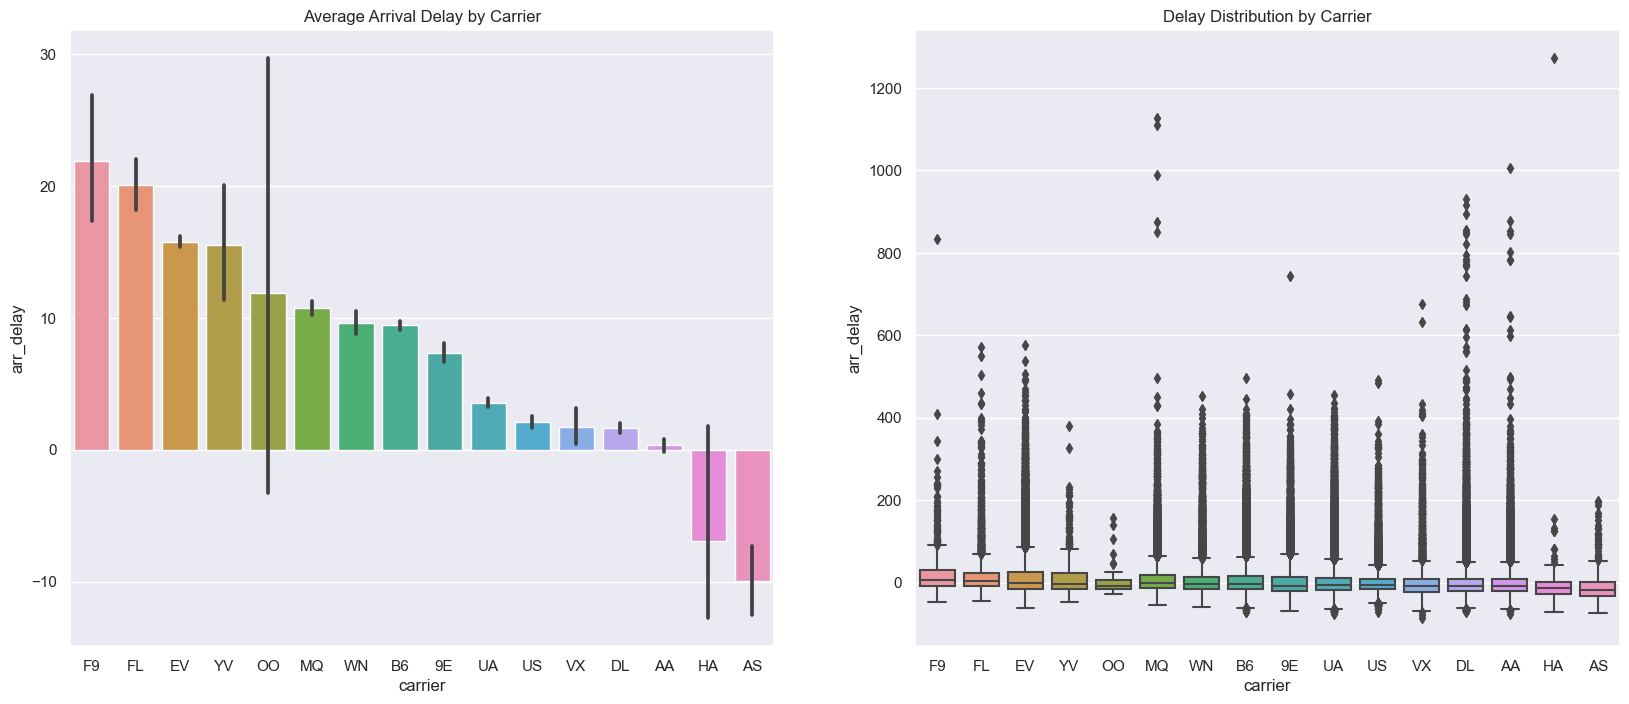

In [146]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('carrier','arr_delay', data=flights,ax=ax[0], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])
                                                                                 
ax[0].set_title('Average Arrival Delay by Carrier')
sns.boxplot('carrier','arr_delay', data=flights,ax=ax[1], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

## Linear model

##### Explore the relationship between the distance and average delay for each location.

In [147]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tail_num,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
7072,2013,1,9,641.00,900,1301.00,1242.00,1530,1272.00,HA,...,N384HA,JFK,HNL,640.00,4983,9,0,2013-01-09T14:00:00Z,2013-01-09,01- January
235778,2013,6,15,1432.00,1935,1137.00,1607.00,2120,1127.00,MQ,...,N504MQ,JFK,CMH,74.00,483,19,35,2013-06-15T23:00:00Z,2013-06-15,06- June
8239,2013,1,10,1121.00,1635,1126.00,1239.00,1810,1109.00,MQ,...,N517MQ,EWR,ORD,111.00,719,16,35,2013-01-10T21:00:00Z,2013-01-10,01- January
327043,2013,9,20,1139.00,1845,1014.00,1457.00,2210,1007.00,AA,...,N338AA,JFK,SFO,354.00,2586,18,45,2013-09-20T22:00:00Z,2013-09-20,09- September
270376,2013,7,22,845.00,1600,1005.00,1044.00,1815,989.00,MQ,...,N665MQ,JFK,CVG,96.00,589,16,0,2013-07-22T20:00:00Z,2013-07-22,07- July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24915,2013,1,29,1703.00,1730,-27.00,1947.00,1957,-10.00,F9,...,N208FR,LGA,DEN,250.00,1620,17,30,2013-01-29T22:00:00Z,2013-01-29,01- January
9619,2013,1,11,1900.00,1930,-30.00,2233.00,2243,-10.00,DL,...,N934DL,LGA,TPA,139.00,1010,19,30,2013-01-12T00:00:00Z,2013-01-11,01- January
64501,2013,11,10,1408.00,1440,-32.00,1549.00,1559,-10.00,EV,...,N825AS,LGA,IAD,52.00,229,14,40,2013-11-10T19:00:00Z,2013-11-10,11- November
113633,2013,2,3,2022.00,2055,-33.00,2240.00,2338,-58.00,DL,...,N612DL,LGA,MSY,162.00,1183,20,55,2013-02-04T01:00:00Z,2013-02-03,02- February


In [148]:
flight_by_Dest = flights.groupby(["dest"]).agg(Gr_Dist = ("distance", "mean"), 
                                                   Gr_Delay = ("arr_delay", "mean"),
                                                   Gr_Count = ("dest", "count")
                                                  )
flight_by_Dest

,Gr_Dist,Gr_Delay,Gr_Count
dest,,,
ABQ,1826.00,4.38,254
ACK,199.00,4.85,264
ALB,143.00,14.40,418
ANC,3370.00,-2.50,8
ATL,757.14,11.30,16837
...,...,...,...
TPA,1003.93,7.41,7390
TUL,1215.00,33.66,294
TVC,652.45,12.97,95


In [149]:
flight_by_Dest.sort_values(by = "Gr_Count", ascending = False).head(10)

,Gr_Dist,Gr_Delay,Gr_Count
dest,,,
ATL,757.14,11.30,16837
ORD,729.02,5.88,16566
LAX,2468.62,0.55,16026
BOS,190.74,2.91,15022
MCO,943.11,5.45,13967
CLT,538.01,7.36,13674
SFO,2577.93,2.67,13173
FLL,1070.06,8.08,11897
MIA,1091.54,0.30,11593


In [150]:
flight_by_Dest.sort_values(by = "Gr_Count", ascending = False).tail(10)

,Gr_Dist,Gr_Delay,Gr_Count
dest,,,
CHO,305.00,9.50,46
BZN,1882.00,7.60,35
JAC,1875.90,28.10,21
PSP,2378.00,-12.72,18
EYW,1207.00,6.35,17
HDN,1728.00,2.14,14
MTJ,1795.00,1.79,14
SBN,645.40,6.50,10
ANC,3370.00,-2.50,8


In [151]:
Frequent_delay_group = flight_by_Dest[flight_by_Dest.Gr_Count > 20]
Frequent_delay_group

,Gr_Dist,Gr_Delay,Gr_Count
dest,,,
ABQ,1826.00,4.38,254
ACK,199.00,4.85,264
ALB,143.00,14.40,418
ATL,757.14,11.30,16837
AUS,1514.25,6.02,2411
...,...,...,...
TPA,1003.93,7.41,7390
TUL,1215.00,33.66,294
TVC,652.45,12.97,95


In [152]:
from plotnine import ggplot, aes, geom_line, geom_area, facet_wrap, labs, geom_point, geom_smooth

In [153]:
import warnings
warnings.filterwarnings('ignore')

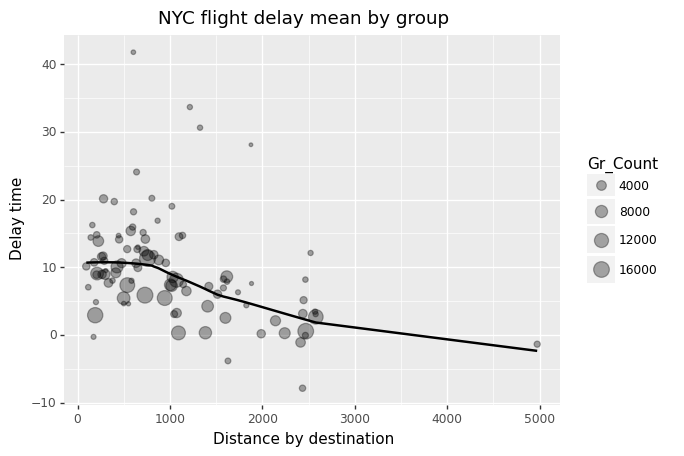

<ggplot: (185573277284)>

In [154]:
p = ggplot(data = Frequent_delay_group, mapping = aes(x = "Gr_Dist", y = "Gr_Delay")) 
p + geom_point(aes(size='Gr_Count'), alpha = 1/3) + geom_smooth() + labs(
        x="Distance by destination",
        y="Delay time",
        title="NYC flight delay mean by group")